In [349]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading and Pre-processing the dataset

In [350]:
data_frame = pd.read_csv('Heart Disease.csv')
# data_frame = data_frame.dropna()
data_frame 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


Dataset has 15 features and 1 target variable 'HeartDisease'. 

In [351]:
# preprocessing data by fillna mode for categorical data and mean for numerical data
data_frame = data_frame.fillna({'male' : data_frame['male'].mode()[0], 
                               'age' : data_frame['age'].mean(), 
                               'education' : data_frame['education'].mode()[0], 
                               'currentSmoker' : data_frame['currentSmoker'].mode()[0], 
                               'cigsPerDay' : data_frame['cigsPerDay'].mean(), 
                               'BPMeds' : data_frame['BPMeds'].mode()[0], 
                               'prevalentStroke' : data_frame['prevalentStroke'].mode()[0], 
                               'prevalentHyp' : data_frame['prevalentHyp'].mode()[0], 
                               'diabetes' : data_frame['diabetes'].mode()[0], 
                               'totChol' : data_frame['totChol'].mean(), 
                               'sysBP' : data_frame['sysBP'].mean(), 
                               'diaBP' : data_frame['diaBP'].mean(), 
                               'BMI' : data_frame['BMI'].mean(), 
                               'heartRate' : data_frame['heartRate'].mean(), 
                               'glucose' : data_frame['glucose'].mean()})

Using fillna to fill the missing values of a categorical data with its mode and numerical data with its mean.

In [352]:
print(data_frame.shape)
total_rows = data_frame.shape[0]

# train-validation-test split
data_frame = data_frame.sample(frac=1)                  
data_frame = data_frame.reset_index(drop=True)                

train_df = data_frame[0 : int(total_rows * 0.7)]                                            # 70%
val_df = data_frame[train_df.shape[0] : train_df.shape[0] + int(total_rows * 0.15)]         # 15%
test_df = data_frame[train_df.shape[0] + val_df.shape[0] : ]                                # 15%

print(train_df.shape, val_df.shape, test_df.shape)

(4238, 16)
(2966, 16) (635, 16) (637, 16)


Splitting the dataset into 70% training 15% validation and 15% testing data.

In [353]:
train_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
0,1,53,1.0,1,30.0,0.0,0,0,0,253.0,121.0,85.5,28.52,80.0,68.0,0
1,0,39,3.0,0,0.0,0.0,0,0,0,195.0,97.5,60.0,20.62,64.0,68.0,0
2,0,42,3.0,1,15.0,0.0,0,0,0,216.0,120.0,70.0,21.93,88.0,88.0,0
3,0,61,2.0,0,0.0,0.0,0,1,0,270.0,174.5,101.5,29.87,80.0,76.0,0
4,0,43,2.0,0,0.0,0.0,0,0,0,213.0,96.0,62.0,19.38,74.0,80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,1,64,1.0,1,20.0,0.0,0,1,0,214.0,155.0,99.0,22.46,75.0,82.0,0
2962,1,51,1.0,0,0.0,0.0,0,0,0,237.0,135.0,87.5,24.87,65.0,63.0,0
2963,1,38,2.0,1,20.0,0.0,0,0,0,279.0,124.0,87.0,26.68,76.0,75.0,0
2964,0,36,2.0,0,0.0,0.0,0,0,0,212.0,102.0,69.0,33.36,55.0,71.0,0


In [354]:
val_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
2966,1,59,3.0,1,20.0,0.0,0,0,0,238.000000,112.5,75.5,26.42,58.0,67.0,1
2967,0,65,1.0,0,0.0,0.0,0,1,0,220.000000,185.5,97.5,38.38,72.0,95.0,1
2968,0,50,1.0,1,20.0,0.0,0,0,0,195.000000,131.5,83.0,24.61,75.0,78.0,0
2969,0,41,2.0,0,0.0,0.0,0,0,0,232.000000,117.5,77.5,20.62,53.0,75.0,0
2970,1,39,1.0,1,20.0,0.0,0,0,0,186.000000,126.0,67.0,22.04,63.0,72.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,0,46,3.0,1,20.0,0.0,0,0,0,218.000000,115.5,62.0,23.48,65.0,77.0,0
3597,0,56,1.0,1,9.0,0.0,0,1,0,320.000000,142.0,84.0,27.90,74.0,95.0,1
3598,0,58,2.0,1,3.0,0.0,0,0,0,236.721585,120.0,80.0,29.25,78.0,75.0,0
3599,0,45,3.0,1,15.0,0.0,0,0,0,210.000000,127.0,76.5,21.67,83.0,72.0,0


In [355]:
test_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
3601,1,40,2.0,1,30.0,0.0,0,0,0,162.0,129.0,76.5,24.120000,70.0,73.000000,0
3602,0,61,2.0,0,0.0,1.0,0,1,0,209.0,133.0,93.0,25.802008,80.0,81.966753,1
3603,0,54,1.0,1,20.0,0.0,0,0,0,274.0,116.0,79.0,24.770000,72.0,65.000000,0
3604,1,68,1.0,0,0.0,0.0,0,1,1,184.0,157.0,97.0,33.160000,110.0,148.000000,1
3605,1,58,1.0,1,20.0,0.0,0,1,0,241.0,152.5,105.0,25.180000,92.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,0,65,2.0,0,0.0,0.0,0,1,0,256.0,149.0,96.0,29.750000,90.0,80.000000,1
4234,1,38,1.0,1,15.0,0.0,0,0,0,183.0,107.5,71.0,23.740000,57.0,74.000000,0
4235,0,59,1.0,0,0.0,0.0,0,1,0,240.0,155.5,100.5,33.540000,72.0,116.000000,1
4236,0,57,2.0,0,0.0,0.0,0,0,0,239.0,127.0,81.0,21.850000,75.0,87.000000,0


### Splitting data into features and labels

In [356]:
Y_train = train_df['HeartDisease']
X_train = train_df.drop(columns = ['HeartDisease'])

Y_val = val_df['HeartDisease']
X_val = val_df.drop(columns = ['HeartDisease'])

Y_test = test_df['HeartDisease']
X_test = test_df.drop(columns = ['HeartDisease'])

### Helper functions: Sigmoid, Cross Entropy loss, Accuracy

In [357]:
# creating helper functions for gradient descent

def initialize_weights(n):
    w = np.ones(n)
    b = 0
    return w, b

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y, y_hat):
    m = y.shape[0]
    epsilon = 1e-6
    return -1/m * np.sum(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))

def accuracy(y, y_hat):
    y_hat = np.where(y_hat >= 0.5, 1, 0)
    return np.mean(y_hat == y)

# (a) Gradient Descent on Unscaled Data

### Function for gradient descent

In [358]:
def gradient_descent(X_train, Y_train, X_val, Y_val, X_test, Y_test, learning_rate, epochs):
    W, b = initialize_weights(X_train.shape[1])

    train_loss = []
    val_loss = []
    test_loss = []

    train_accuracies = []
    val_accuracies = []
    test_accuracies = []

    Weights = []
    Biases = []

    m = X_train.shape[0]

    for epoch in range(epochs):
        z = np.dot(X_train, W) + b
        y_hat = sigmoid(z)
        loss = cross_entropy_loss(Y_train, y_hat)

        dW = 1/m * np.dot(X_train.T, (y_hat - Y_train))
        db = 1/m * np.sum(y_hat - Y_train)

        W -= learning_rate * dW
        b -= learning_rate * db

        train_loss.append(loss)
        val_loss.append(cross_entropy_loss(Y_val, sigmoid(np.dot(X_val, W) + b)))
        test_loss.append(cross_entropy_loss(Y_test, sigmoid(np.dot(X_test, W) + b)))

        train_accuracies.append(accuracy(Y_train, sigmoid(np.dot(X_train, W) + b)))
        val_accuracies.append(accuracy(Y_val, sigmoid(np.dot(X_val, W) + b)))
        test_accuracies.append(accuracy(Y_test, sigmoid(np.dot(X_test, W) + b)))

        Weights.append(W)
        Biases.append(b)

    return W, b, train_loss, val_loss, test_loss, train_accuracies, val_accuracies, test_accuracies, Weights, Biases

In [359]:
# batch gradient descent on unscaled data

epochs = 90000
learning_rate = 0.0001

W, b, train_loss, val_loss, test_loss, train_accuracy, val_accuracy, test_accuracy, Weights, Biases = gradient_descent(X_train, Y_train, X_val, Y_val, X_test, Y_test, learning_rate, epochs)
    

### Plotting the loss and accuracy

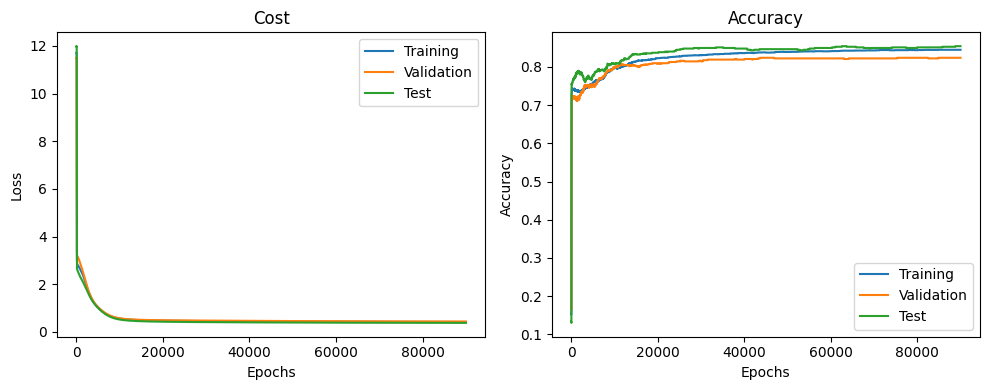

Epochs:  90000
Learning Rate:  0.0001
Training Loss:  0.4181924534665948
Training Accuracy:  0.844571813890762
Validation Loss:  0.4406239380431604
Validation Accuracy:  0.8236220472440945
Test Loss:  0.3820356875121941
Test Accuracy:  0.8540031397174255
Weights:  [ 0.85907561  0.02666912  0.1776508   0.84745543 -0.01809632  0.99880894
  1.00517791  1.03235256  1.01450175 -0.00232353  0.01237655 -0.03171568
 -0.05263322 -0.02246008  0.00111474]
Bias:  -0.08210944596265236


In [360]:
# plotting loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.plot(test_loss, label='test loss')
plt.title('Cost')
plt.legend(['Training', 'Validation', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='train accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.plot(test_accuracy, label='test accuracy')
plt.title('Accuracy')
plt.legend(['Training', 'Validation', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# printing the costs and accuracies
print("Epochs: ", epochs)
print("Learning Rate: ", learning_rate)

print("Training Loss: ", train_loss[-1])
print("Training Accuracy: ", train_accuracy[-1])
print("Validation Loss: ", val_loss[-1])
print("Validation Accuracy: ", val_accuracy[-1])
print("Test Loss: ", test_loss[-1])
print("Test Accuracy: ", test_accuracy[-1])

print("Weights: ", W)
print("Bias: ", b)

For 90000 iterations and learning rate 0.0001 we see our model starts converging after around 20000 iterations for unscaled data. The loss also stabilises to around 0.4 and accuracy to around 0.84 after these iterations. However the search path looks ineffecient as there is no stable increase in accuracy.

# (b) Gradient Descent on Scaled Data

### Min-Max Scaling
data = (data - data.min()) / (data.max() - data.min())

In [361]:
# min-max scaling
X_train_scaled = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_val_scaled = (X_val - X_val.min()) / (X_val.max() - X_val.min())
X_test_scaled = (X_test - X_test.min()) / (X_test.max() - X_test.min())

W_scaled, b_scaled = initialize_weights(X_train_scaled.shape[1])

In [362]:
X_train_scaled

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.552632,0.000000,1.0,0.428571,0.0,0.0,0.0,0.0,0.225524,0.171429,0.394444,0.314590,0.375000,0.079096
1,0.0,0.184211,0.666667,0.0,0.000000,0.0,0.0,0.0,0.0,0.124126,0.059524,0.111111,0.123122,0.208333,0.079096
2,0.0,0.263158,0.666667,1.0,0.214286,0.0,0.0,0.0,0.0,0.160839,0.166667,0.222222,0.154872,0.458333,0.135593
3,0.0,0.763158,0.333333,0.0,0.000000,0.0,0.0,1.0,0.0,0.255245,0.426190,0.572222,0.347310,0.375000,0.101695
4,0.0,0.289474,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.155594,0.052381,0.133333,0.093068,0.312500,0.112994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,1.0,0.842105,0.000000,1.0,0.285714,0.0,0.0,1.0,0.0,0.157343,0.333333,0.544444,0.167717,0.322917,0.118644
2962,1.0,0.500000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.197552,0.238095,0.416667,0.226127,0.218750,0.064972
2963,1.0,0.157895,0.333333,1.0,0.285714,0.0,0.0,0.0,0.0,0.270979,0.185714,0.411111,0.269995,0.333333,0.098870
2964,0.0,0.105263,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.153846,0.080952,0.211111,0.431895,0.114583,0.087571


In [363]:
X_val_scaled

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2966,1.0,0.702703,0.666667,1.0,0.333333,0.0,0.0,0.0,0.0,0.366947,0.127090,0.291005,0.332874,0.1625,0.10625
2967,0.0,0.864865,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.316527,0.615385,0.523810,0.744578,0.3375,0.28125
2968,0.0,0.459459,0.000000,1.0,0.333333,0.0,0.0,0.0,0.0,0.246499,0.254181,0.370370,0.270568,0.3750,0.17500
2969,0.0,0.216216,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.350140,0.160535,0.312169,0.133219,0.1000,0.15625
2970,1.0,0.162162,0.000000,1.0,0.333333,0.0,0.0,0.0,0.0,0.221289,0.217391,0.201058,0.182100,0.2250,0.13750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,0.0,0.351351,0.666667,1.0,0.333333,0.0,0.0,0.0,0.0,0.310924,0.147157,0.148148,0.231670,0.2500,0.16875
3597,0.0,0.621622,0.000000,1.0,0.150000,0.0,0.0,1.0,0.0,0.596639,0.324415,0.380952,0.383821,0.3625,0.28125
3598,0.0,0.675676,0.333333,1.0,0.050000,0.0,0.0,0.0,0.0,0.363366,0.177258,0.338624,0.430293,0.4125,0.15625
3599,0.0,0.324324,0.666667,1.0,0.250000,0.0,0.0,0.0,0.0,0.288515,0.224080,0.301587,0.169363,0.4750,0.13750


In [364]:
X_test_scaled

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3601,1.0,0.171429,0.333333,1.0,0.500000,0.0,0.0,0.0,0.0,0.150350,0.333333,0.279221,0.214348,0.231579,0.117857
3602,0.0,0.771429,0.333333,0.0,0.000000,1.0,0.0,1.0,0.0,0.314685,0.362637,0.493506,0.263003,0.336842,0.149881
3603,0.0,0.571429,0.000000,1.0,0.333333,0.0,0.0,0.0,0.0,0.541958,0.238095,0.311688,0.233150,0.252632,0.089286
3604,1.0,0.971429,0.000000,0.0,0.000000,0.0,0.0,1.0,1.0,0.227273,0.538462,0.545455,0.475846,0.652632,0.385714
3605,1.0,0.685714,0.000000,1.0,0.333333,0.0,0.0,1.0,0.0,0.426573,0.505495,0.649351,0.245010,0.463158,0.160714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,0.0,0.885714,0.333333,0.0,0.000000,0.0,0.0,1.0,0.0,0.479021,0.479853,0.532468,0.377206,0.442105,0.142857
4234,1.0,0.114286,0.000000,1.0,0.250000,0.0,0.0,0.0,0.0,0.223776,0.175824,0.207792,0.203356,0.094737,0.121429
4235,0.0,0.714286,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.423077,0.527473,0.590909,0.486838,0.252632,0.271429
4236,0.0,0.657143,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.419580,0.318681,0.337662,0.148684,0.284211,0.167857


### Running Gradient Descent on Scaled Data

In [365]:
epochs = 90000
learning_rate = 0.0001

train_loss_scaled = []
val_loss_scaled = []
test_loss_scaled = []
Weights_scaled = []
Biases_scaled = []
train_accuracy_scaled = []
val_accuracy_scaled = []
test_accuracy_scaled = []

m = X_train_scaled.shape[0]

for epoch in range(epochs):
    z = np.dot(X_train_scaled, W_scaled) + b_scaled
    y_hat = sigmoid(z)
    loss = cross_entropy_loss(Y_train, y_hat)
    
    dW = 1 / m * np.dot(X_train_scaled.T, (y_hat - Y_train))
    db = 1 / m * np.sum(y_hat - Y_train)

    W_scaled -= learning_rate * dW
    b_scaled -= learning_rate * db

    train_loss_scaled.append(loss)
    val_loss_scaled.append(cross_entropy_loss(Y_val, sigmoid(np.dot(X_val_scaled, W_scaled) + b_scaled)))
    test_loss_scaled.append(cross_entropy_loss(Y_test, sigmoid(np.dot(X_test_scaled, W_scaled) + b_scaled)))

    Weights_scaled.append(W_scaled)
    Biases_scaled.append(b_scaled)

    train_accuracy_scaled.append(accuracy(Y_train, y_hat))
    val_accuracy_scaled.append(accuracy(Y_val, sigmoid(np.dot(X_val_scaled, W_scaled) + b_scaled)))
    test_accuracy_scaled.append(accuracy(Y_test, sigmoid(np.dot(X_test_scaled, W_scaled) + b_scaled)))

### Plotting the loss and accuracy

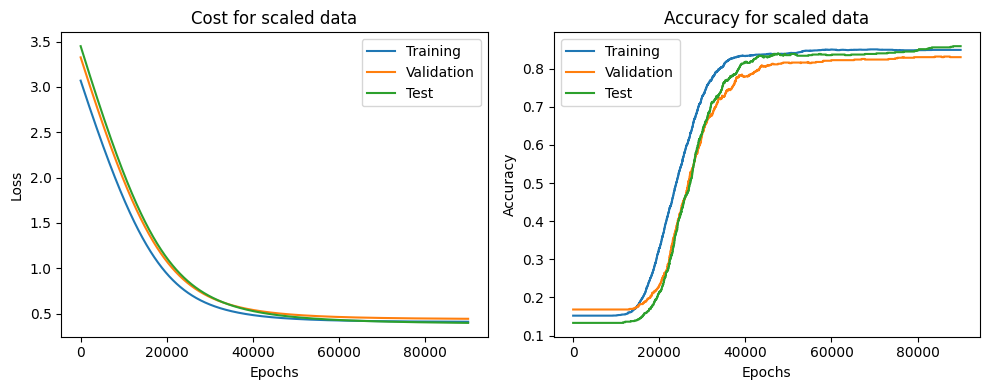

Epochs:  90000
Learning Rate:  0.0001
Training Loss:  0.4093533746369167
Training Accuracy:  0.8489548213081591
Validation Loss:  0.4419667254702871
Validation Accuracy:  0.8299212598425196
Test Loss:  0.39672846623241065
Test Accuracy:  0.858712715855573
Weights:  [ 0.04814814  0.02337468  0.15881095 -0.16912908  0.70053126  0.92317605
  0.99328019  0.28630378  0.93980349  0.54514835  0.4968039   0.15771707
  0.41777361  0.21889135  0.73165811]
Bias:  -2.316239688197629


In [366]:
# plotting loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_scaled, label='train loss')
plt.plot(val_loss_scaled, label='val loss')
plt.plot(test_loss_scaled, label='test loss')
plt.title('Cost for scaled data')
plt.legend(['Training', 'Validation', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_scaled, label='train accuracy')
plt.plot(val_accuracy_scaled, label='val accuracy')
plt.plot(test_accuracy_scaled, label='test accuracy')
plt.title('Accuracy for scaled data')
plt.legend(['Training', 'Validation', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# printing the costs and accuracies
print("Epochs: ", epochs)
print("Learning Rate: ", learning_rate)

print("Training Loss: ", train_loss_scaled[-1])
print("Training Accuracy: ", train_accuracy_scaled[-1])
print("Validation Loss: ", val_loss_scaled[-1])
print("Validation Accuracy: ", val_accuracy_scaled[-1])
print("Test Loss: ", test_loss_scaled[-1])
print("Test Accuracy: ", test_accuracy_scaled[-1])

print("Weights: ", W_scaled)
print("Bias: ", b_scaled)

For 90000 iterations and learning rate 0.0001 we see our model starts converging between 20000 to 40000 iterations for scaled data. The loss also stabilises to around 0.4 and accuracy to around 0.84 after these iterations. The search path looks stable and we see a more stable convergence for scaled data when we compare it with unscaled data.

# (c) Performance metrics 

In [367]:
def performance(Y, Y_pred_prob):
    # Convert probabilities to binary predictions using a 0.5 threshold for other metrics
    Y_pred = np.where(Y_pred_prob >= 0.5, 1, 0)

    # True Positives, True Negatives, False Positives, False Negatives
    TP = np.sum((Y == 1) & (Y_pred == 1))
    TN = np.sum((Y == 0) & (Y_pred == 0))
    FP = np.sum((Y == 0) & (Y_pred == 1))
    FN = np.sum((Y == 1) & (Y_pred == 0))

    print("True Positives: ", TP)
    print("True Negatives: ", TN)
    print("False Positives: ", FP)
    print("False Negatives: ", FN)

    # Precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    # Recall
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    # F1 Score
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    # Confusion Matrix
    confusion_matrix = np.array([[TN, FP], [FN, TP]])
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(confusion_matrix, cmap='YlOrRd', interpolation='nearest')
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0, 1])
    plt.yticks([0, 1])

    # ROC AUC Curve
    thresholds = np.linspace(0, 1, 100)  # Create a range of thresholds between 0 and 1
    tpr_lst = []
    fpr_lst = []

    for threshold in thresholds:
        # Thresholding Y_pred_prob for ROC
        Y_pred_threshold = np.where(Y_pred_prob >= threshold, 1, 0)

        TP = np.sum((Y == 1) & (Y_pred_threshold == 1))
        TN = np.sum((Y == 0) & (Y_pred_threshold == 0))
        FP = np.sum((Y == 0) & (Y_pred_threshold == 1))
        FN = np.sum((Y == 1) & (Y_pred_threshold == 0))

        tpr = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate (Recall)
        fpr = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate

        tpr_lst.append(tpr)
        fpr_lst.append(fpr)

    tpr_lst = np.array(tpr_lst)
    fpr_lst = np.array(fpr_lst)

    # Plot ROC curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr_lst, tpr_lst, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(['ROC curve'])
    plt.tight_layout()
    plt.show()

    # AUC Calculation
    auc = abs(np.trapezoid(tpr_lst, fpr_lst))
    print("AUC: ", auc)


    # fpr = FP / (FP + TN)
    # tpr = TP / (TP + FN)

    # fpr_lst = []
    # tpr_lst = []

    # for i in range(len(Y_pred)):
    #     fpr_lst.append(FP / (FP + TN))
    #     tpr_lst.append(TP / (TP + FN))          

    # plt.subplot(1, 2, 2)
    # plt.plot(fpr, tpr, 'ro')
    # plt.title('ROC Curve')
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')

    # plt.tight_layout()
    # plt.show()

    # plt.figure()
    # plt.plot(fpr_lst, tpr_lst, color='darkorange', lw=2, label='ROC curve')
    # plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('Receiver Operating Characteristic')
    # plt.legend(loc="lower right")
    # plt.show()
    
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)

    return precision, recall, f1

def performance_inv(Y, Y_pred_prob):
    # Convert probabilities to binary predictions using a 0.5 threshold
    Y_pred = np.where(Y_pred_prob >= 0.5, 1, 0)

    # True Positives, True Negatives, False Positives, False Negatives (inverted logic)
    TP = np.sum((Y == 0) & (Y_pred == 0))  # Inverted: TP are the correctly predicted 0s
    TN = np.sum((Y == 1) & (Y_pred == 1))  # Inverted: TN are the correctly predicted 1s
    FP = np.sum((Y == 1) & (Y_pred == 0))  # Inverted: FP are the 1s incorrectly predicted as 0s
    FN = np.sum((Y == 0) & (Y_pred == 1))  # Inverted: FN are the 0s incorrectly predicted as 1s

    print("True Positives: ", TP)
    print("True Negatives: ", TN)
    print("False Positives: ", FP)
    print("False Negatives: ", FN)

    # Precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    # Recall
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    # F1 Score
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    # Confusion Matrix
    confusion_matrix = np.array([[TN, FP], [FN, TP]])  # Maintain the structure for plotting
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(confusion_matrix, cmap='YlOrRd', interpolation='nearest')
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0, 1])
    plt.yticks([0, 1])

    # ROC AUC Curve (Use probability scores for different thresholds)
    thresholds = np.linspace(0, 1, 100)
    tpr_lst = []
    fpr_lst = []

    for threshold in thresholds:
        # Thresholding Y_pred_prob for ROC
        Y_pred_threshold = np.where(Y_pred_prob >= threshold, 1, 0)

        TP = np.sum((Y == 0) & (Y_pred_threshold == 0))
        TN = np.sum((Y == 1) & (Y_pred_threshold == 1))
        FP = np.sum((Y == 1) & (Y_pred_threshold == 0))
        FN = np.sum((Y == 0) & (Y_pred_threshold == 1))

        tpr = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate (Recall)
        fpr = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate

        tpr_lst.append(tpr)
        fpr_lst.append(fpr)

    tpr_lst = np.array(tpr_lst)
    fpr_lst = np.array(fpr_lst)

    # Plot ROC curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr_lst, tpr_lst, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(['ROC curve'])
    plt.tight_layout()
    plt.show()

    # AUC Calculation
    auc = np.trapezoid(tpr_lst, fpr_lst)
    print("AUC: ", auc)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)

    return precision, recall, f1


True Positives:  3
True Negatives:  520
False Positives:  8
False Negatives:  104


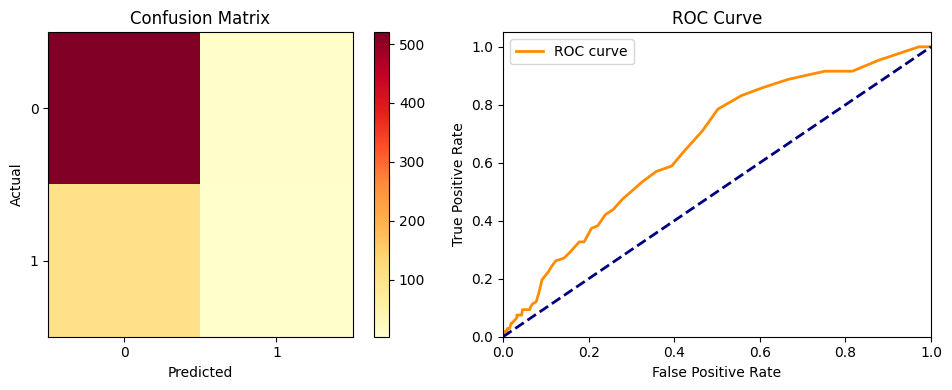

AUC:  0.6591794109317474
Precision:  0.2727272727272727
Recall:  0.028037383177570093
F1 Score:  0.05084745762711864


(np.float64(0.2727272727272727),
 np.float64(0.028037383177570093),
 np.float64(0.05084745762711864))

In [368]:
performance(Y_val, sigmoid(np.dot(X_val, W) + b))

When we take class 1 as positive and class 0 as negative, we see a large number of true negatives and false negatives and an auc score of around 0.65 which suggests that our model is better than random guessing but still has room for improvement. The the number of false and true negatives are due to our dataset being comprised of mostly class 0 values (Which we take as negative here).

The ROC curve is used to evaluate the performance of a binary classifier. It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. The AUC is the area under the ROC curve. The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

True Positives:  524
True Negatives:  3
False Positives:  104
False Negatives:  4


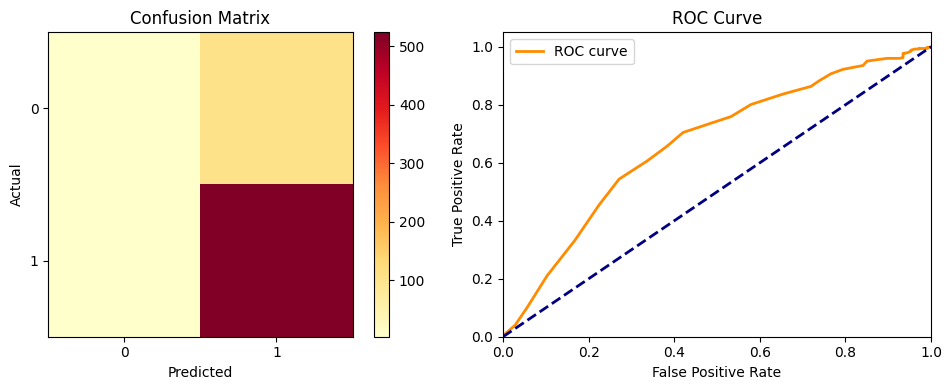

AUC:  0.6656311951288587
Precision:  0.8343949044585988
Recall:  0.9924242424242424
F1 Score:  0.9065743944636678


(np.float64(0.8343949044585988),
 np.float64(0.9924242424242424),
 np.float64(0.9065743944636678))

In [369]:
performance_inv(Y_val, sigmoid(np.dot(X_val_scaled, W_scaled) + b_scaled))

When we take class 0 as positive and class 1 as negative, we see a large number of true positives and false positives and an auc score of around 0.66 which suggests that our model is better than random guessing but still has room for improvement. The the number of false and true positives are due to our dataset being comprised of mostly class 0 values (Which we take as positive here).

# (d) Stochastic Gradient Descent and Mini-batch Gradient Descent

## Stochastic Gradient Descent

In [370]:
# stochastic gradient descent

epochs = 1000
learning_rate = 0.000003

W_stoch, b_stoch = initialize_weights(X_train.shape[1])

train_loss_stoch = []
val_loss_stoch = []
test_loss_stoch = []
Weights_stoch = []
Biases_stoch = []
train_accuracy_stoch = []
val_accuracy_stoch = []
test_accuracy_stoch = []

m = X_train.shape[0]

for epoch in range(epochs):
    X_sample = X_train_scaled.sample(frac = 1)
    Y_sample = Y_train.loc[X_sample.index]

    y_hat = sigmoid(np.dot(X_sample, W_stoch) + b_stoch)

    dW = np.dot(X_sample.T, (y_hat - Y_sample))

    db = np.sum(y_hat - Y_sample)

    W_stoch -= learning_rate * dW
    b_stoch -= learning_rate * db

    train_loss_stoch.append(cross_entropy_loss(Y_train, sigmoid(np.dot(X_train_scaled, W_stoch) + b_stoch)))
    val_loss_stoch.append(cross_entropy_loss(Y_val, sigmoid(np.dot(X_val_scaled, W_stoch) + b_stoch)))
    test_loss_stoch.append(cross_entropy_loss(Y_test, sigmoid(np.dot(X_test_scaled, W_stoch) + b_stoch)))

    Weights_stoch.append(W_stoch)
    Biases_stoch.append(b_stoch)

    train_accuracy_stoch.append(accuracy(Y_train, sigmoid(np.dot(X_train_scaled, W_stoch) + b_stoch)))
    val_accuracy_stoch.append(accuracy(Y_val, sigmoid(np.dot(X_val_scaled, W_stoch) + b_stoch)))
    test_accuracy_stoch.append(accuracy(Y_test, sigmoid(np.dot(X_test_scaled, W_stoch) + b_stoch)))

### Plotting the loss and accuracy

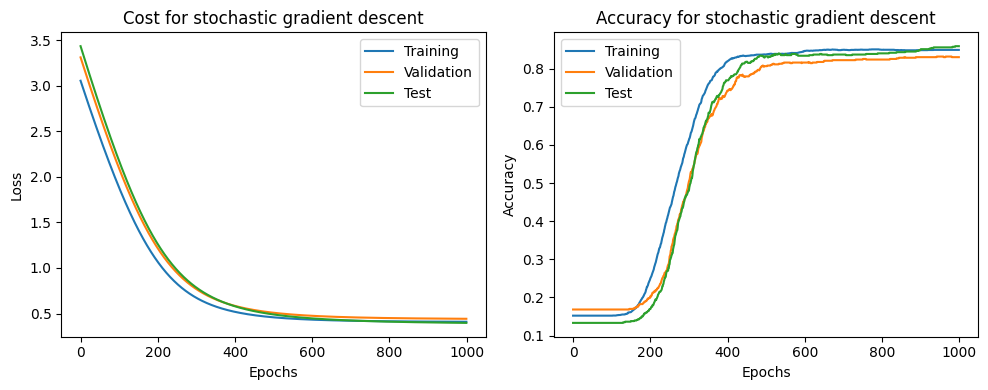

Epochs:  1000
Learning Rate:  3e-06
Training Loss:  0.40949817213933654
Training Accuracy:  0.8489548213081591
Validation Loss:  0.4421910726738169
Validation Accuracy:  0.8299212598425196
Test Loss:  0.39714522935068974
Test Accuracy:  0.858712715855573
Weights:  [ 0.04797243  0.02332972  0.16051648 -0.16844575  0.70060682  0.9234154
  0.99325079  0.28653171  0.93994577  0.54561547  0.49708334  0.15848834
  0.41843575  0.21987038  0.73190456]
Bias:  -2.313581488661836


In [371]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_stoch, label='train loss')
plt.plot(val_loss_stoch, label='val loss')
plt.plot(test_loss_stoch, label='test loss')
plt.title('Cost for stochastic gradient descent')
plt.legend(['Training', 'Validation', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_stoch, label='train accuracy')
plt.plot(val_accuracy_stoch, label='val accuracy')
plt.plot(test_accuracy_stoch, label='test accuracy')
plt.title('Accuracy for stochastic gradient descent')
plt.legend(['Training', 'Validation', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# printing the costs and accuracies
print("Epochs: ", epochs)
print("Learning Rate: ", learning_rate)

print("Training Loss: ", train_loss_stoch[-1])
print("Training Accuracy: ", train_accuracy_stoch[-1])
print("Validation Loss: ", val_loss_stoch[-1])
print("Validation Accuracy: ", val_accuracy_stoch[-1])
print("Test Loss: ", test_loss_stoch[-1])
print("Test Accuracy: ", test_accuracy_stoch[-1])

print("Weights: ", W_stoch)
print("Bias: ", b_stoch)

For stochastic gradient descent we do not notice much of a convergence and the accuracy plot is noisy. This is beacause for each iteration we select a random sample and update the weights. This leads to a noisy search path. 

The accuracy remainaing consistent throughout our codes suggest a poor dataset due to poor distribution of classes.

## Mini-batch Gradient Descent

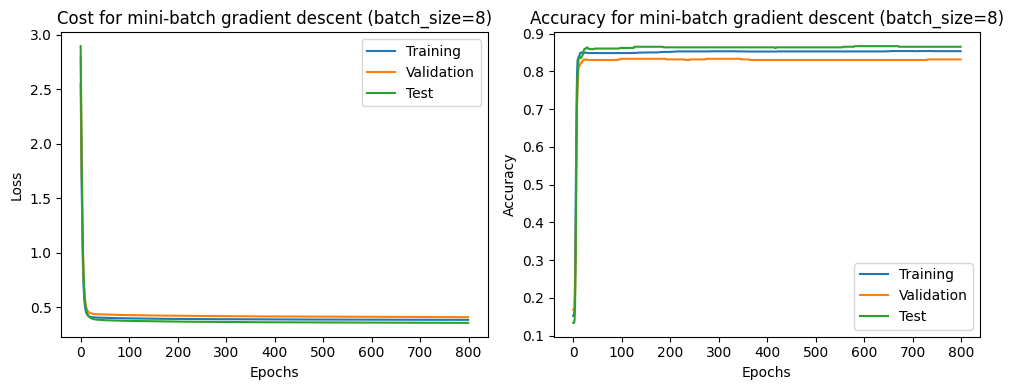

Batch Size: 8
Final Training Loss:  0.38517790867111024
Final Training Accuracy:  0.8533378287255563
Final Validation Loss:  0.4099052641417506
Final Validation Accuracy:  0.831496062992126
Final Test Loss:  0.3572096138100467
Final Test Accuracy:  0.8649921507064364
Final Weights:  [ 0.46024025  1.53954719 -0.30546564  0.0238545   0.95309363  0.67045648
  1.05909112  0.41656917  0.79715828  0.48296263  0.87372255  0.17869535
  0.14320649 -0.16397647  0.8159261 ]
Final Bias:  -3.4222734460141764


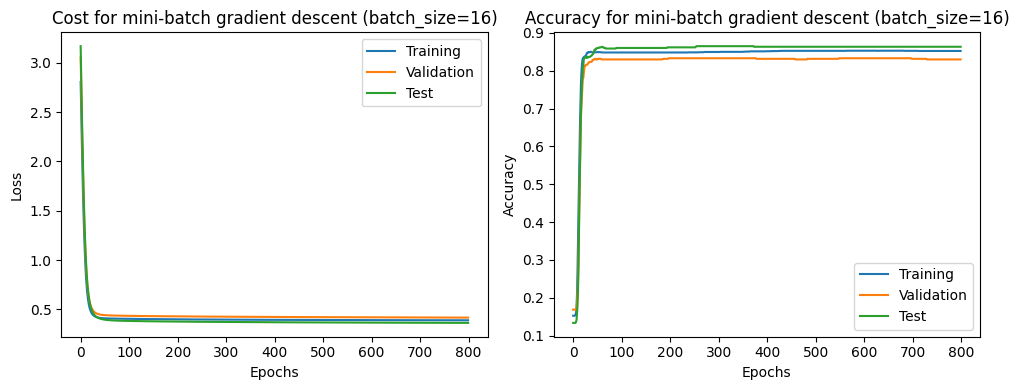

Batch Size: 16
Final Training Loss:  0.38887681097081633
Final Training Accuracy:  0.8523263654753878
Final Validation Loss:  0.4160305010939835
Final Validation Accuracy:  0.8299212598425196
Final Test Loss:  0.36256197331753576
Final Test Accuracy:  0.8634222919937206
Final Weights:  [ 0.44165713  0.97564804 -0.33743464 -0.02900371  0.8484818   0.7677509
  1.03458107  0.47672932  0.864829    0.48502072  0.69120546  0.12277344
  0.23035973 -0.06463075  0.75185211]
Final Bias:  -3.0706807257177187


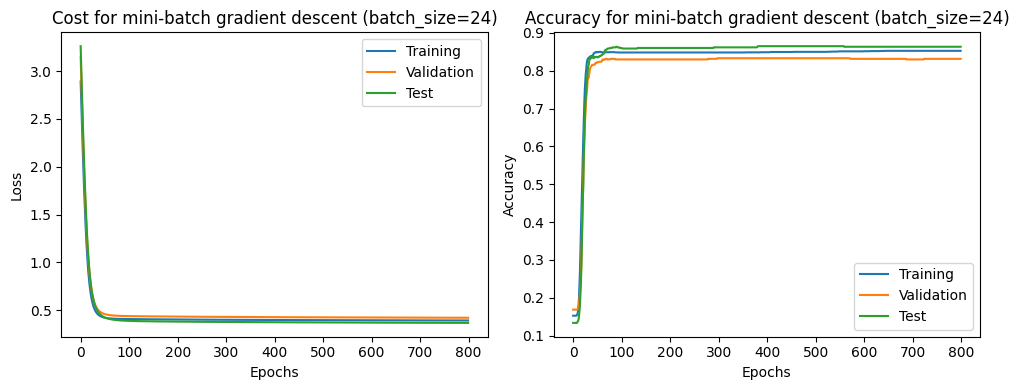

Batch Size: 24
Final Training Loss:  0.3914968223363446
Final Training Accuracy:  0.8526635198921105
Final Validation Loss:  0.4199677157174894
Final Validation Accuracy:  0.831496062992126
Final Test Loss:  0.366256337162806
Final Test Accuracy:  0.8634222919937206
Final Weights:  [ 0.40758004  0.68997184 -0.29644968 -0.06257679  0.80744585  0.81630892
  1.02374019  0.48135671  0.8920962   0.49017884  0.62335617  0.1155764
  0.2754767  -0.006169    0.73485272]
Final Bias:  -2.904633987201381


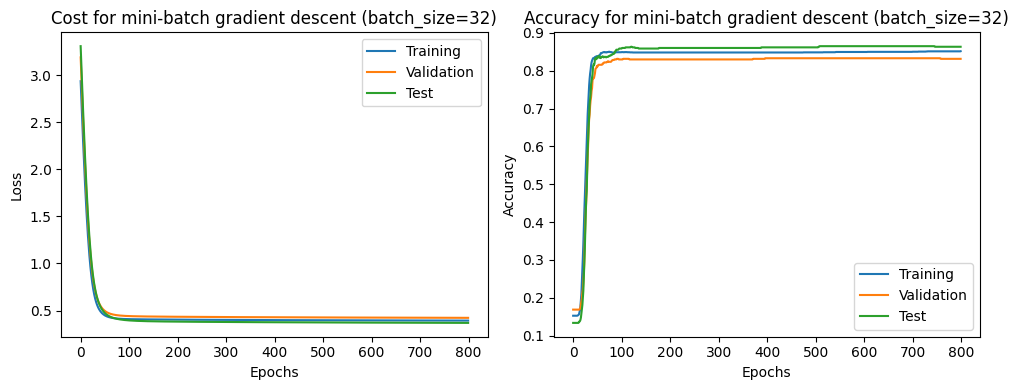

Batch Size: 32
Final Training Loss:  0.39347674604523214
Final Training Accuracy:  0.851652056641942
Final Validation Loss:  0.4226483799493182
Final Validation Accuracy:  0.831496062992126
Final Test Loss:  0.36898759833062217
Final Test Accuracy:  0.8634222919937206
Final Weights:  [ 0.36877843  0.52222161 -0.24500612 -0.08579681  0.78398785  0.84394058
  1.01723612  0.46801396  0.90605152  0.49529608  0.58741623  0.1156337
  0.30287729  0.03235326  0.72811788]
Final Bias:  -2.801788680353816


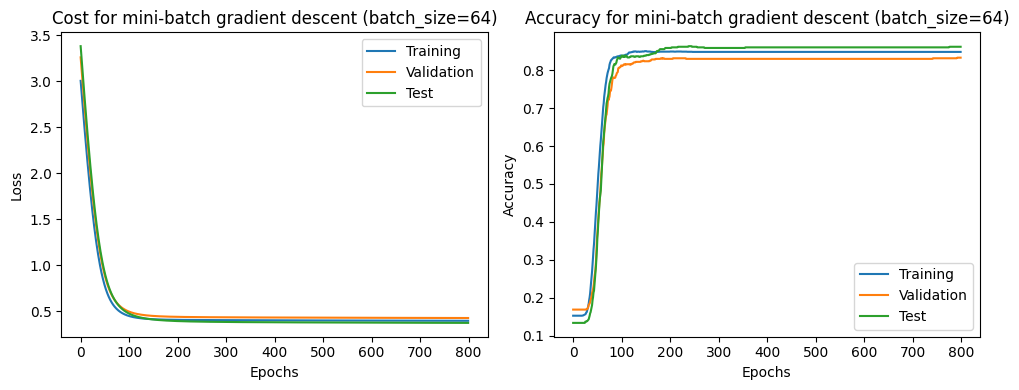

Batch Size: 64
Final Training Loss:  0.39860472810305647
Final Training Accuracy:  0.8482805124747134
Final Validation Loss:  0.42866034649048673
Final Validation Accuracy:  0.8330708661417323
Final Test Loss:  0.3757293718538606
Final Test Accuracy:  0.8618524332810047
Final Weights:  [ 0.24141451  0.23650417 -0.0908049  -0.13624323  0.74025978  0.88806234
  1.00513929  0.39839989  0.92582625  0.51010227  0.52985009  0.12217589
  0.35306761  0.11047669  0.722265  ]
Final Bias:  -2.600093890527015


In [377]:
epochs = 800
learning_rate = 0.001
batch_sizes = [8, 16, 24, 32, 64]

for batch_size in batch_sizes:

    # Initialize weights
    W_mini, b_mini = initialize_weights(X_train.shape[1])

    train_loss_mini = []
    val_loss_mini = []
    test_loss_mini = []
    Weights_mini = []
    Biases_mini = []
    train_accuracy_mini = []
    val_accuracy_mini = []
    test_accuracy_mini = []

    m = X_train.shape[0]

    # Mini-batch gradient descent
    for epoch in range(epochs):
        # Shuffle training data at the start of each epoch
        shuffled_indices = np.random.permutation(m)
        X_train_shuffled = X_train_scaled.iloc[shuffled_indices].reset_index(drop=True)
        Y_train_shuffled = Y_train.iloc[shuffled_indices].reset_index(drop=True)

        # Loop over batches
        for i in range(0, m, batch_size):
            X_sample = X_train_shuffled.iloc[i:i + batch_size]
            Y_sample = Y_train_shuffled.iloc[i:i + batch_size]

            # Forward pass
            y_hat = sigmoid(np.dot(X_sample, W_mini) + b_mini)

            # Compute gradients (averaged across the batch)
            dW = (1 / batch_size) * np.dot(X_sample.T, (y_hat - Y_sample))
            db = (1 / batch_size) * np.sum(y_hat - Y_sample)

            # Update weights
            W_mini -= learning_rate * dW
            b_mini -= learning_rate * db

        # Compute losses and accuracies at the end of the epoch
        train_loss = cross_entropy_loss(Y_train, sigmoid(np.dot(X_train_scaled, W_mini) + b_mini))
        val_loss = cross_entropy_loss(Y_val, sigmoid(np.dot(X_val_scaled, W_mini) + b_mini))
        test_loss = cross_entropy_loss(Y_test, sigmoid(np.dot(X_test_scaled, W_mini) + b_mini))

        train_loss_mini.append(train_loss)
        val_loss_mini.append(val_loss)
        test_loss_mini.append(test_loss)

        Weights_mini.append(W_mini)
        Biases_mini.append(b_mini)

        train_accuracy = accuracy(Y_train, sigmoid(np.dot(X_train_scaled, W_mini) + b_mini))
        val_accuracy = accuracy(Y_val, sigmoid(np.dot(X_val_scaled, W_mini) + b_mini))
        test_accuracy = accuracy(Y_test, sigmoid(np.dot(X_test_scaled, W_mini) + b_mini))

        train_accuracy_mini.append(train_accuracy)
        val_accuracy_mini.append(val_accuracy)
        test_accuracy_mini.append(test_accuracy)

    # Plotting the loss and accuracy (outside the epoch loop)
    plt.figure(figsize=(10, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_mini, label='train loss')
    plt.plot(val_loss_mini, label='val loss')
    plt.plot(test_loss_mini, label='test loss')
    plt.title(f'Cost for mini-batch gradient descent (batch_size={batch_size})')
    plt.legend(['Training', 'Validation', 'Test'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy_mini, label='train accuracy')
    plt.plot(val_accuracy_mini, label='val accuracy')
    plt.plot(test_accuracy_mini, label='test accuracy')
    plt.title(f'Accuracy for mini-batch gradient descent (batch_size={batch_size})')
    plt.legend(['Training', 'Validation', 'Test'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

    # Print final losses and accuracies for the current batch size
    print(f"Batch Size: {batch_size}")
    print("Final Training Loss: ", train_loss_mini[-1])
    print("Final Training Accuracy: ", train_accuracy_mini[-1])
    print("Final Validation Loss: ", val_loss_mini[-1])
    print("Final Validation Accuracy: ", val_accuracy_mini[-1])
    print("Final Test Loss: ", test_loss_mini[-1])
    print("Final Test Accuracy: ", test_accuracy_mini[-1])

    print("Final Weights: ", W_mini)
    print("Final Bias: ", b_mini)


For mini-batch gradient descent we see a more stable convergence and the accuracy plot is less noisy. This is beacause for each iteration we select a random batch of samples and update the weights. This leads to a better performance than stochastic gradient descent. However this method is computationally expensive as compared to stochastic gradient descent. 

Mini batch gradient descent does reduce the complexity when compared to batch gradient descent but batch gradient descent is more stable and accurate.

# (e) K-Fold Cross Validation

In [378]:
folds = 5
epochs = 5000
learning_rate = 0.001

# Combine train and validation sets
X_train_val = pd.concat([X_train, X_val])
Y_train_val = pd.concat([Y_train, Y_val])

# Shuffle the combined dataset
X_train_val = X_train_val.sample(frac=1, random_state=42).reset_index(drop=True)
Y_train_val = Y_train_val.loc[X_train_val.index].reset_index(drop=True)

# Calculate fold size
k = X_train_val.shape[0] // folds  # Integer division to avoid floating-point issues

fold_costs = []
fold_accuracies = []
fold_Ws = []
fold_bs = []

# Loop over each fold
for fold in range(folds):
    # Set aside the validation fold
    X_val_fold = X_train_val.iloc[fold * k : (fold + 1) * k].reset_index(drop=True)
    Y_val_fold = Y_train_val.iloc[fold * k : (fold + 1) * k].reset_index(drop=True)

    # Remaining as the training set
    X_train_fold = X_train_val.drop(X_train_val.index[fold * k : (fold + 1) * k]).reset_index(drop=True)
    Y_train_fold = Y_train_val.drop(Y_train_val.index[fold * k : (fold + 1) * k]).reset_index(drop=True)

    # Use training fold's min/max for scaling
    X_train_fold_min = X_train_fold.min()
    X_train_fold_max = X_train_fold.max()

    X_train_fold_scaled = (X_train_fold - X_train_fold_min) / (X_train_fold_max - X_train_fold_min)
    X_val_fold_scaled = (X_val_fold - X_train_fold_min) / (X_train_fold_max - X_train_fold_min)

    # Scale the test set using min/max from the whole training set
    X_test_scaled = (X_test - X_train_fold_min) / (X_train_fold_max - X_train_fold_min)

    # Training using gradient descent
    W, b, train_costs, val_costs, test_costs, train_accuracies, val_accuracies, test_accuracies, Weights, Biases = gradient_descent(
        X_train_fold_scaled, Y_train_fold, X_val_fold_scaled, Y_val_fold, X_test_scaled, Y_test, learning_rate, epochs
    )

    # Store results for this fold
    fold_costs.append((train_costs, val_costs, test_costs))
    fold_accuracies.append((train_accuracies, val_accuracies, test_accuracies))
    fold_Ws.append(W)
    fold_bs.append(b)


### Plotting the loss and accuracy

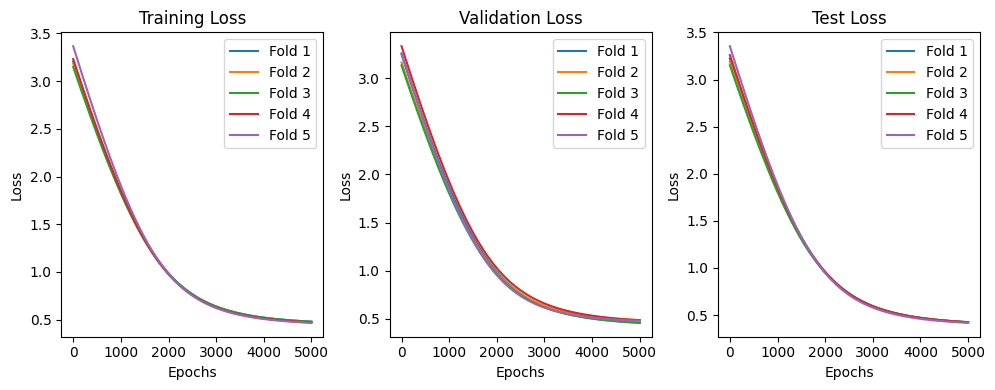

Average Training Loss:  0.4731127059065452
Standard Deviation Training Loss:  0.00514125393077108
Average Validation Loss:  0.47360918009246367
Standard Deviation Validation Loss:  0.012648189092234207
Average Test Loss:  0.4222149170465995
Standard Deviation Test Loss:  0.0028245293930817582


In [380]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
for fold in fold_costs:
    plt.plot(fold[0])
plt.title('Training Loss')
plt.legend(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 3, 2)
for fold in fold_costs:
    plt.plot(fold[1])
plt.title('Validation Loss')
plt.legend(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 3, 3)
for fold in fold_costs:
    plt.plot(fold[2])
plt.title('Test Loss')
plt.legend(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

print("Average Training Loss: ", np.mean([fold[0][-1] for fold in fold_costs]))
print("Standard Deviation Training Loss: ", np.std([fold[0][-1] for fold in fold_costs]))

print("Average Validation Loss: ", np.mean([fold[1][-1] for fold in fold_costs]))
print("Standard Deviation Validation Loss: ", np.std([fold[1][-1] for fold in fold_costs]))

print("Average Test Loss: ", np.mean([fold[2][-1] for fold in fold_costs]))
print("Standard Deviation Test Loss: ", np.std([fold[2][-1] for fold in fold_costs]))

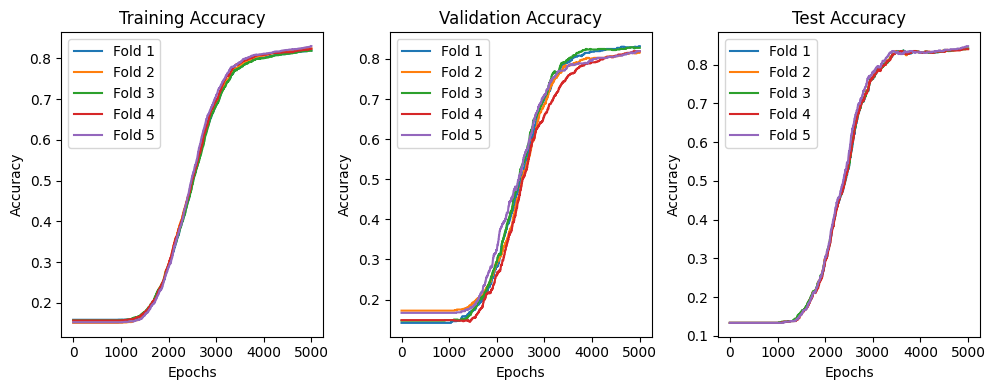

Average Training Accuracy:  0.8228392919125304
Standard Deviation Training Accuracy:  0.004069240094343042
Average Validation Accuracy:  0.8230555555555557
Standard Deviation Validation Accuracy:  0.0058001702827280965
Average Test Accuracy:  0.842386185243328
Standard Deviation Test Accuracy:  0.002737142193746124


In [381]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
for fold in fold_accuracies:
    plt.plot(fold[0])
plt.title('Training Accuracy')
plt.legend(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
for fold in fold_accuracies:
    plt.plot(fold[1])
plt.title('Validation Accuracy')
plt.legend(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 3)
for fold in fold_accuracies:
    plt.plot(fold[2])
plt.title('Test Accuracy')
plt.legend(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

print("Average Training Accuracy: ", np.mean([fold[0][-1] for fold in fold_accuracies]))
print("Standard Deviation Training Accuracy: ", np.std([fold[0][-1] for fold in fold_accuracies]))

print("Average Validation Accuracy: ", np.mean([fold[1][-1] for fold in fold_accuracies]))
print("Standard Deviation Validation Accuracy: ", np.std([fold[1][-1] for fold in fold_accuracies]))

print("Average Test Accuracy: ", np.mean([fold[2][-1] for fold in fold_accuracies]))
print("Standard Deviation Test Accuracy: ", np.std([fold[2][-1] for fold in fold_accuracies]))

For K-fold cross validation, where we use 5 folds, we can see that the training and validation loss and accuracy curves are quite similar across the folds. This indicates that the model is generalizing well to the unseen data. The average and standard deviation of the losses and accuracies are also consistent across the folds.

### Precision, Recall, F1 Score

In [382]:
# average and standard deviation of precision, recall, f1 score

precisions = []
recalls = []
f1s = []

for i in range(folds):
    TP = np.sum((Y_test == 1) & (sigmoid(np.dot(X_test_scaled, fold_Ws[i]) + fold_bs[i]) >= 0.5))
    TN = np.sum((Y_test == 0) & (sigmoid(np.dot(X_test_scaled, fold_Ws[i]) + fold_bs[i]) < 0.5))
    FP = np.sum((Y_test == 0) & (sigmoid(np.dot(X_test_scaled, fold_Ws[i]) + fold_bs[i]) >= 0.5))
    FN = np.sum((Y_test == 1) & (sigmoid(np.dot(X_test_scaled, fold_Ws[i]) + fold_bs[i]) < 0.5))

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

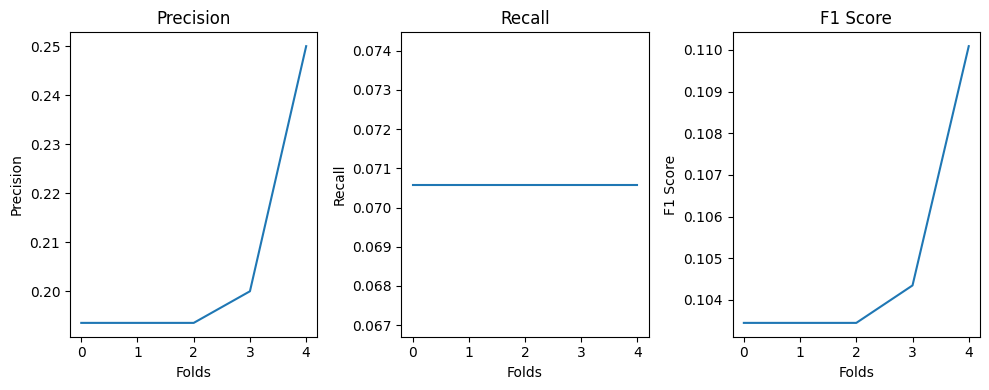

Average Precision:  0.2061290322580645
Standard Deviation Precision:  0.022077340170669257
Average Recall:  0.07058823529411765
Standard Deviation Recall:  0.0
Average F1 Score:  0.1049568793584859
Standard Deviation F1 Score:  0.0025909621864295216


In [383]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.plot(precisions)
plt.title('Precision')
plt.xlabel('Folds')
plt.ylabel('Precision')

plt.subplot(1, 3, 2)
plt.plot(recalls)
plt.title('Recall')
plt.xlabel('Folds')
plt.ylabel('Recall')

plt.subplot(1, 3, 3)
plt.plot(f1s)
plt.title('F1 Score')
plt.xlabel('Folds')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

print("Average Precision: ", np.mean(precisions))
print("Standard Deviation Precision: ", np.std(precisions))

print("Average Recall: ", np.mean(recalls))
print("Standard Deviation Recall: ", np.std(recalls))

print("Average F1 Score: ", np.mean(f1s))
print("Standard Deviation F1 Score: ", np.std(f1s))

Precison and F1-score all show similar deviations across the folds as one would expect since we change the training and validation data across the folds. We notice a consistent recall probably because our dataset is not well balanced and has a large number of class 0 values.

# (f) Regularization

Best gradient descent method: Scaled Gradient Descent since it has a more stable convergence with less noise\
Best stopping criteria to avoid overfitting: Early Stopping\
Implement early stopping using L2 regularization

We must also note that there is not a lot of overfitting so there might not b significant changes in the accuracy and loss but the convergence might be earlier.

## Ridge Regularization: L2 Regularization

In [384]:
def gradient_descent_ridge(X_train, Y_train, X_val, Y_val, X_test, Y_test, learning_rate, epochs, alpha):
    W, b = initialize_weights(X_train.shape[1])

    train_loss = []
    val_loss = []
    test_loss = []
    train_accuracy = []
    val_accuracy = []
    test_accuracy = []

    Weights = []
    Biases = []

    m = X_train.shape[0]

    for epoch in range(epochs):
        z = np.dot(X_train, W) + b
        y_hat = sigmoid(z)
        loss = cross_entropy_loss(Y_train, y_hat) + alpha * np.sum(W ** 2)

        dW = 1/m * np.dot(X_train.T, (y_hat - Y_train)) + 2 * alpha * W
        db = 1/m * np.sum(y_hat - Y_train)

        W -= learning_rate * dW
        b -= learning_rate * db

        train_loss.append(loss)
        val_loss.append(cross_entropy_loss(Y_val, sigmoid(np.dot(X_val, W) + b)))
        test_loss.append(cross_entropy_loss(Y_test, sigmoid(np.dot(X_test, W) + b)))

        Weights.append(W)
        Biases.append(b)

        train_accuracy.append(accuracy(Y_train, y_hat))
        val_accuracy.append(accuracy(Y_val, sigmoid(np.dot(X_val, W) + b)))
        test_accuracy.append(accuracy(Y_test, sigmoid(np.dot(X_test, W) + b)))

    return W, b, train_loss, val_loss, test_loss, train_accuracy, val_accuracy, test_accuracy, Weights, Biases

In [385]:
def gradient_descent_scaled_ridge(X_train, Y_train, X_val, Y_val, X_test, Y_test, learning_rate, epochs, alpha):
    W, b = initialize_weights(X_train.shape[1])

    train_loss = []
    val_loss = []
    test_loss = []
    train_accuracy = []
    val_accuracy = []
    test_accuracy = []

    Weights = []
    Biases = []

    m = X_train.shape[0]

    for epoch in range(epochs):
        z = np.dot(X_train, W) + b
        y_hat = sigmoid(z)
        loss = cross_entropy_loss(Y_train, y_hat) + alpha * np.sum(W ** 2)

        dW = 1/m * np.dot(X_train.T, (y_hat - Y_train)) + 2 * alpha * W
        db = 1/m * np.sum(y_hat - Y_train)

        W -= learning_rate * dW
        b -= learning_rate * db

        train_loss.append(loss)
        val_loss.append(cross_entropy_loss(Y_val, sigmoid(np.dot(X_val, W) + b)))
        test_loss.append(cross_entropy_loss(Y_test, sigmoid(np.dot(X_test, W) + b)))

        Weights.append(W)
        Biases.append(b)

        train_accuracy.append(accuracy(Y_train, y_hat))
        val_accuracy.append(accuracy(Y_val, sigmoid(np.dot(X_val, W) + b)))
        test_accuracy.append(accuracy(Y_test, sigmoid(np.dot(X_test, W) + b)))

    return W, b, train_loss, val_loss, test_loss, train_accuracy, val_accuracy, test_accuracy, Weights, Biases

In [387]:
alphas = [0.001, 0.01, 0.1, 1, 10]

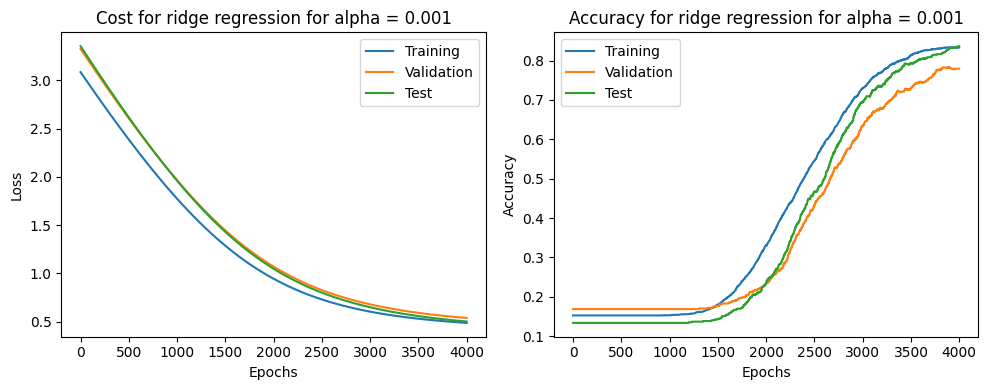

Training Loss:  0.486982555860363
Training Accuracy:  0.8334457181389077
Validation Loss:  0.5377457530218459
Validation Accuracy:  0.7795275590551181
Test Loss:  0.5011553467774306
Test Accuracy:  0.8367346938775511
Weights:  [ 0.14594845  0.13305432  0.32092673 -0.01214437  0.73131516  0.93634445
  0.98539259  0.38026961  0.94659409  0.61090033  0.5621255   0.28340699
  0.50681724  0.3443588   0.76651652]
Bias:  -1.941606671386727


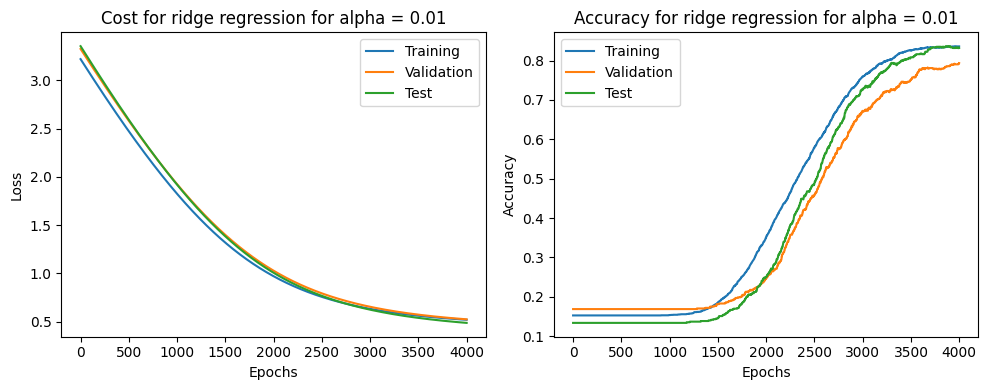

Training Loss:  0.518357066773077
Training Accuracy:  0.8361429534726905
Validation Loss:  0.523383079560454
Validation Accuracy:  0.7937007874015748
Test Loss:  0.4863835497506067
Test Accuracy:  0.8320251177394035
Weights:  [ 0.13308392  0.12080601  0.29405239 -0.01624625  0.67947683  0.87117044
  0.9170224   0.35281031  0.88085478  0.5665003   0.52136644  0.26035025
  0.46907347  0.31680318  0.71220076]
Bias:  -1.9017314948813215


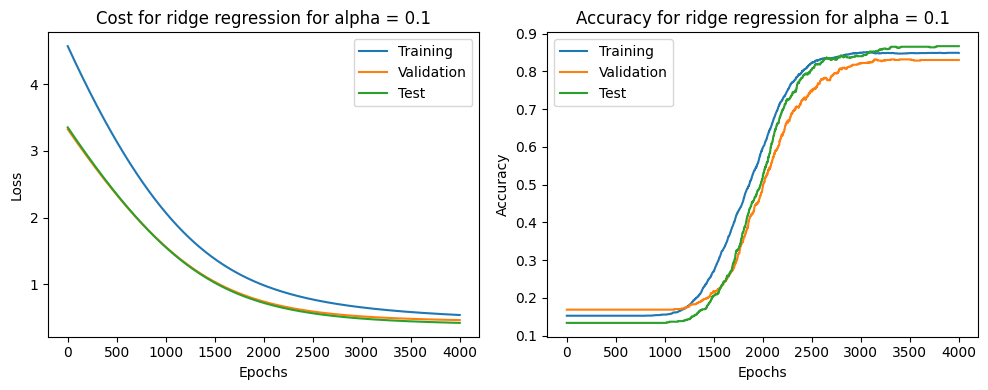

Training Loss:  0.5420587969650658
Training Accuracy:  0.8486176668914363
Validation Loss:  0.4659304293357003
Validation Accuracy:  0.8299212598425196
Test Loss:  0.42414055086335517
Test Accuracy:  0.8665620094191523
Weights:  [ 0.04926862  0.04032408  0.11416858 -0.03876821  0.3247058   0.42560086
  0.44732508  0.17066142  0.43089455  0.26330712  0.24386327  0.106196
  0.212425    0.13112016  0.34045853]
Bias:  -1.5947242251033515


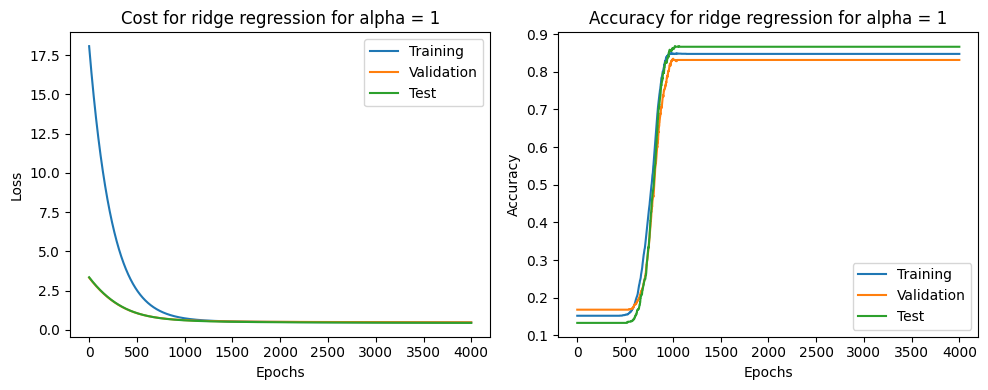

Training Loss:  0.4637415095239325
Training Accuracy:  0.8476062036412677
Validation Loss:  0.47747356061835233
Validation Accuracy:  0.831496062992126
Test Loss:  0.44088193272557763
Test Accuracy:  0.8665620094191523
Weights:  [-0.01580019 -0.01839827 -0.02189559 -0.02625043 -0.00529085  0.00173116
  0.00099654 -0.00375674  0.0019709  -0.01026814 -0.00899544 -0.01759871
 -0.01309717 -0.01873989 -0.00505102]
Bias:  -0.9936499545995667


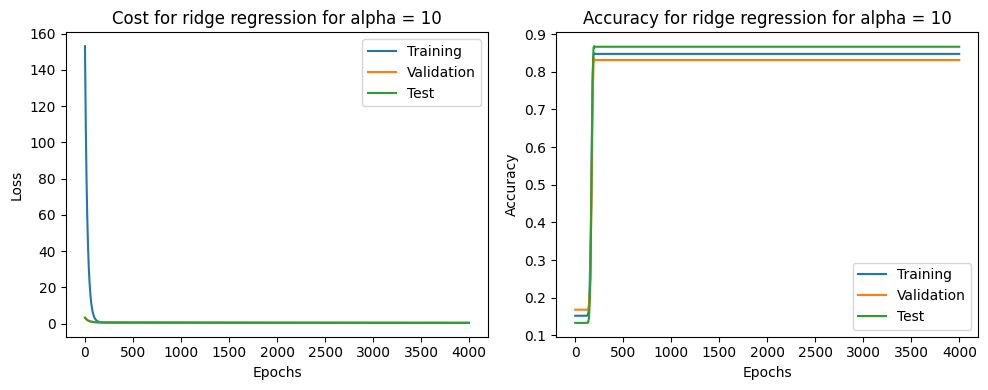

Training Loss:  0.4778055554036806
Training Accuracy:  0.8476062036412677
Validation Loss:  0.49193412687254945
Validation Accuracy:  0.831496062992126
Test Loss:  0.4601359718404014
Test Accuracy:  0.8665620094191523
Weights:  [-2.05822385e-03 -2.30709545e-03 -2.53701905e-03 -3.17945478e-03
 -7.00207598e-04  1.13777496e-04  6.18451259e-05 -7.06591063e-04
  1.40687552e-04 -1.24368568e-03 -1.14412684e-03 -2.13610860e-03
 -1.57483319e-03 -2.21709869e-03 -6.48877751e-04]
Bias:  -0.9007296605597906


In [391]:
for alpha in alphas:
    results_ridge = gradient_descent_ridge(X_train_scaled, Y_train, X_val_scaled, Y_val, X_test_scaled, Y_test, 0.001, 4000, alpha)
    W = results_ridge[0]
    b = results_ridge[1]
    train_loss = results_ridge[2]
    val_loss = results_ridge[3]
    test_loss = results_ridge[4]
    train_accuracy = results_ridge[5]
    val_accuracy = results_ridge[6]
    test_accuracy = results_ridge[7]
    Weights = results_ridge[8]
    Biases = results_ridge[9]

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(val_loss, label='val loss')
    plt.plot(test_loss, label='test loss')
    plt.title('Cost for ridge regression for alpha = ' + str(alpha))
    plt.legend(['Training', 'Validation', 'Test'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='train accuracy')
    plt.plot(val_accuracy, label='val accuracy')
    plt.plot(test_accuracy, label='test accuracy')
    plt.title('Accuracy for ridge regression for alpha = ' + str(alpha))
    plt.legend(['Training', 'Validation', 'Test'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

    print("Training Loss: ", train_loss[-1])
    print("Training Accuracy: ", train_accuracy[-1])
    print("Validation Loss: ", val_loss[-1])
    print("Validation Accuracy: ", val_accuracy[-1])
    print("Test Loss: ", test_loss[-1])
    print("Test Accuracy: ", test_accuracy[-1])

    print("Weights: ", W)
    print("Bias: ", b)

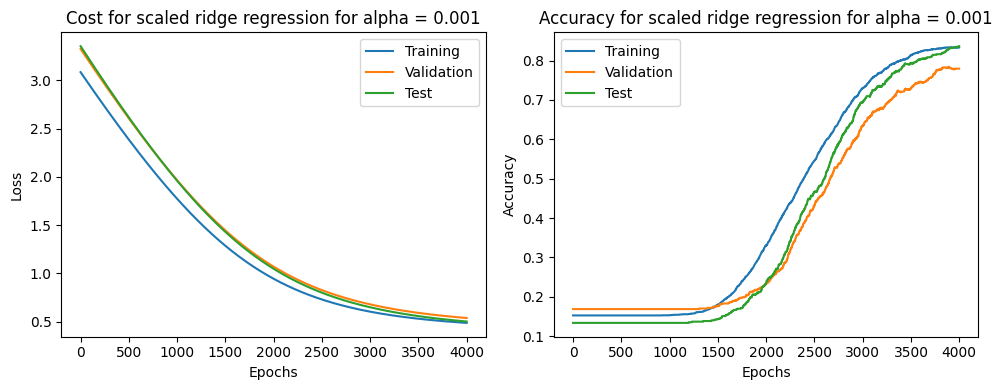

Training Loss:  0.486982555860363
Training Accuracy:  0.8334457181389077
Validation Loss:  0.5377457530218459
Validation Accuracy:  0.7795275590551181
Test Loss:  0.5011553467774306
Test Accuracy:  0.8367346938775511
Weights:  [ 0.14594845  0.13305432  0.32092673 -0.01214437  0.73131516  0.93634445
  0.98539259  0.38026961  0.94659409  0.61090033  0.5621255   0.28340699
  0.50681724  0.3443588   0.76651652]
Bias:  -1.941606671386727


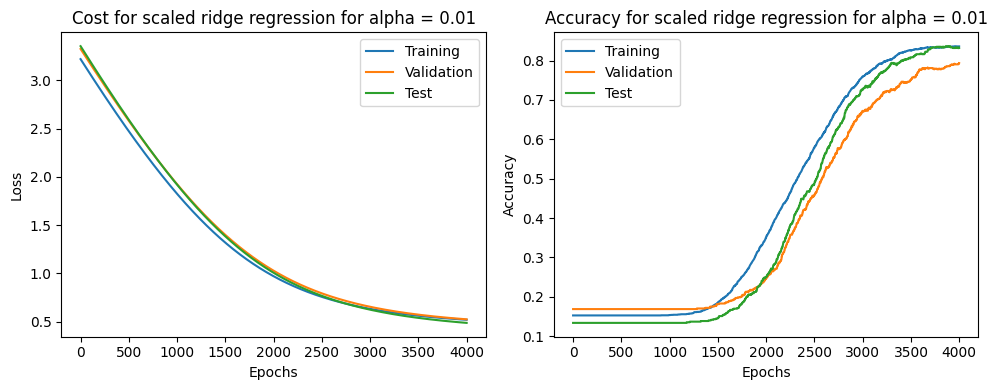

Training Loss:  0.518357066773077
Training Accuracy:  0.8361429534726905
Validation Loss:  0.523383079560454
Validation Accuracy:  0.7937007874015748
Test Loss:  0.4863835497506067
Test Accuracy:  0.8320251177394035
Weights:  [ 0.13308392  0.12080601  0.29405239 -0.01624625  0.67947683  0.87117044
  0.9170224   0.35281031  0.88085478  0.5665003   0.52136644  0.26035025
  0.46907347  0.31680318  0.71220076]
Bias:  -1.9017314948813215


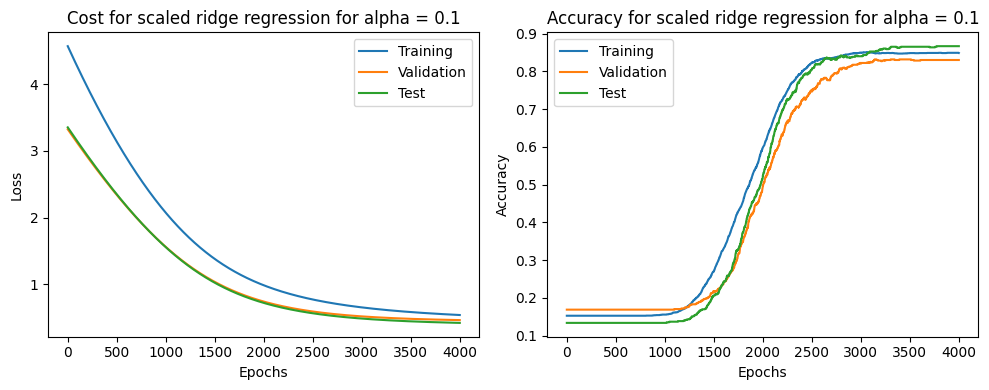

Training Loss:  0.5420587969650658
Training Accuracy:  0.8486176668914363
Validation Loss:  0.4659304293357003
Validation Accuracy:  0.8299212598425196
Test Loss:  0.42414055086335517
Test Accuracy:  0.8665620094191523
Weights:  [ 0.04926862  0.04032408  0.11416858 -0.03876821  0.3247058   0.42560086
  0.44732508  0.17066142  0.43089455  0.26330712  0.24386327  0.106196
  0.212425    0.13112016  0.34045853]
Bias:  -1.5947242251033515


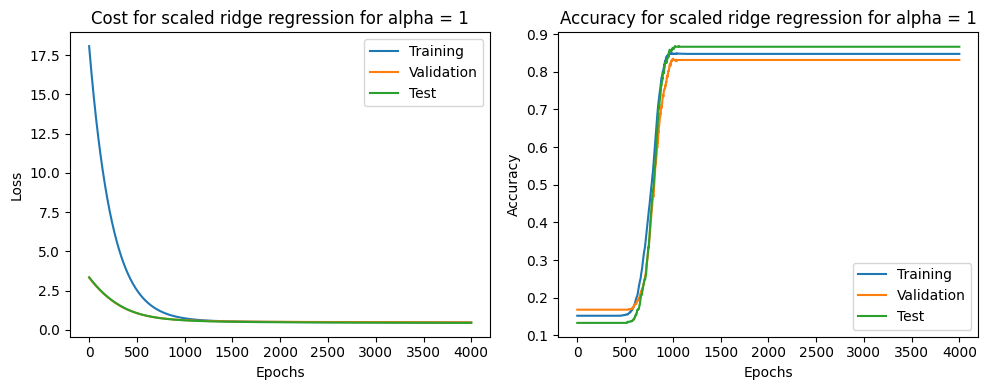

Training Loss:  0.4637415095239325
Training Accuracy:  0.8476062036412677
Validation Loss:  0.47747356061835233
Validation Accuracy:  0.831496062992126
Test Loss:  0.44088193272557763
Test Accuracy:  0.8665620094191523
Weights:  [-0.01580019 -0.01839827 -0.02189559 -0.02625043 -0.00529085  0.00173116
  0.00099654 -0.00375674  0.0019709  -0.01026814 -0.00899544 -0.01759871
 -0.01309717 -0.01873989 -0.00505102]
Bias:  -0.9936499545995667


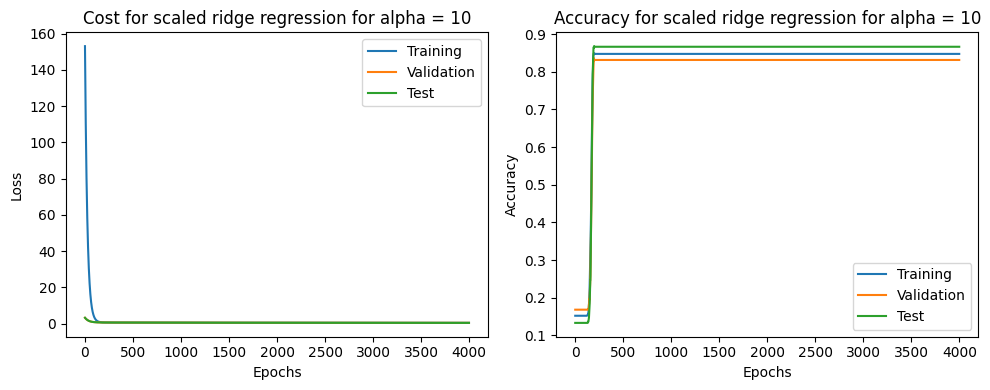

Training Loss:  0.4778055554036806
Training Accuracy:  0.8476062036412677
Validation Loss:  0.49193412687254945
Validation Accuracy:  0.831496062992126
Test Loss:  0.4601359718404014
Test Accuracy:  0.8665620094191523
Weights:  [-2.05822385e-03 -2.30709545e-03 -2.53701905e-03 -3.17945478e-03
 -7.00207598e-04  1.13777496e-04  6.18451259e-05 -7.06591063e-04
  1.40687552e-04 -1.24368568e-03 -1.14412684e-03 -2.13610860e-03
 -1.57483319e-03 -2.21709869e-03 -6.48877751e-04]
Bias:  -0.9007296605597906


In [392]:
for alpha in alphas:
    results_scaled_ridge = gradient_descent_scaled_ridge(X_train_scaled, Y_train, X_val_scaled, Y_val, X_test_scaled, Y_test, 0.001, 4000, alpha)
    W_scaled = results_scaled_ridge[0]
    b_scaled = results_scaled_ridge[1]
    train_loss_scaled = results_scaled_ridge[2]
    val_loss_scaled = results_scaled_ridge[3]
    test_loss_scaled = results_scaled_ridge[4]
    train_accuracy_scaled = results_scaled_ridge[5]
    val_accuracy_scaled = results_scaled_ridge[6]
    test_accuracy_scaled = results_scaled_ridge[7]
    Weights_scaled = results_scaled_ridge[8]
    Biases_scaled = results_scaled_ridge[9]

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_scaled, label='train loss')
    plt.plot(val_loss_scaled, label='val loss')
    plt.plot(test_loss_scaled, label='test loss')
    plt.title('Cost for scaled ridge regression for alpha = ' + str(alpha))
    plt.legend(['Training', 'Validation', 'Test'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy_scaled, label='train accuracy')
    plt.plot(val_accuracy_scaled, label='val accuracy')
    plt.plot(test_accuracy_scaled, label='test accuracy')
    plt.title('Accuracy for scaled ridge regression for alpha = ' + str(alpha))
    plt.legend(['Training', 'Validation', 'Test'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

    print("Training Loss: ", train_loss_scaled[-1])
    print("Training Accuracy: ", train_accuracy_scaled[-1])
    print("Validation Loss: ", val_loss_scaled[-1])
    print("Validation Accuracy: ", val_accuracy_scaled[-1])
    print("Test Loss: ", test_loss_scaled[-1])
    print("Test Accuracy: ", test_accuracy_scaled[-1])

    print("Weights: ", W_scaled)
    print("Bias: ", b_scaled)

As we increase the value of alpha, we notice a better and improved convergence as well as strong effects of early stopping compared to our original graphs. This is because the regularization term penalizes the weights more heavily and hence the model converges faster. However, such large values of alpha might lead to underfitting.

### Lasso Regularization: L1 Regularization

In [393]:
def gradient_descent_lasso(X_train, Y_train, X_val, Y_val, X_test, Y_test, learning_rate, epochs, alpha):
    W, b = initialize_weights(X_train.shape[1])

    train_loss = []
    val_loss = []
    test_loss = []
    train_accuracy = []
    val_accuracy = []
    test_accuracy = []

    Weights = []
    Biases = []

    m = X_train.shape[0]

    for epoch in range(epochs):
        z = np.dot(X_train, W) + b
        y_hat = sigmoid(z)
        loss = cross_entropy_loss(Y_train, y_hat) + alpha * np.sum(np.abs(W))

        dW = 1/m * np.dot(X_train.T, (y_hat - Y_train)) + alpha * np.sign(W)
        db = 1/m * np.sum(y_hat - Y_train)

        W -= learning_rate * dW
        b -= learning_rate * db

        train_loss.append(loss)
        val_loss.append(cross_entropy_loss(Y_val, sigmoid(np.dot(X_val, W) + b)))
        test_loss.append(cross_entropy_loss(Y_test, sigmoid(np.dot(X_test, W) + b)))

        Weights.append(W)
        Biases.append(b)

        train_accuracy.append(accuracy(Y_train, y_hat))
        val_accuracy.append(accuracy(Y_val, sigmoid(np.dot(X_val, W) + b)))
        test_accuracy.append(accuracy(Y_test, sigmoid(np.dot(X_test, W) + b)))

    return W, b, train_loss, val_loss, test_loss, train_accuracy, val_accuracy, test_accuracy, Weights, Biases

In [394]:
def gradient_descent_scaled_lasso(X_train, Y_train, X_val, Y_val, X_test, Y_test, learning_rate, epochs, alpha):
    W, b = initialize_weights(X_train.shape[1])

    train_loss = []
    val_loss = []
    test_loss = []
    train_accuracy = []
    val_accuracy = []
    test_accuracy = []

    Weights = []
    Biases = []

    m = X_train.shape[0]

    for epoch in range(epochs):
        z = np.dot(X_train, W) + b
        y_hat = sigmoid(z)
        loss = cross_entropy_loss(Y_train, y_hat) + alpha * np.sum(np.abs(W))

        dW = 1/m * np.dot(X_train.T, (y_hat - Y_train)) + alpha * np.sign(W)
        db = 1/m * np.sum(y_hat - Y_train)

        W -= learning_rate * dW
        b -= learning_rate * db

        train_loss.append(loss)
        val_loss.append(cross_entropy_loss(Y_val, sigmoid(np.dot(X_val, W) + b)))
        test_loss.append(cross_entropy_loss(Y_test, sigmoid(np.dot(X_test, W) + b)))

        Weights.append(W)
        Biases.append(b)

        train_accuracy.append(accuracy(Y_train, y_hat))
        val_accuracy.append(accuracy(Y_val, sigmoid(np.dot(X_val, W) + b)))
        test_accuracy.append(accuracy(Y_test, sigmoid(np.dot(X_test, W) + b)))

    return W, b, train_loss, val_loss, test_loss, train_accuracy, val_accuracy, test_accuracy, Weights, Biases

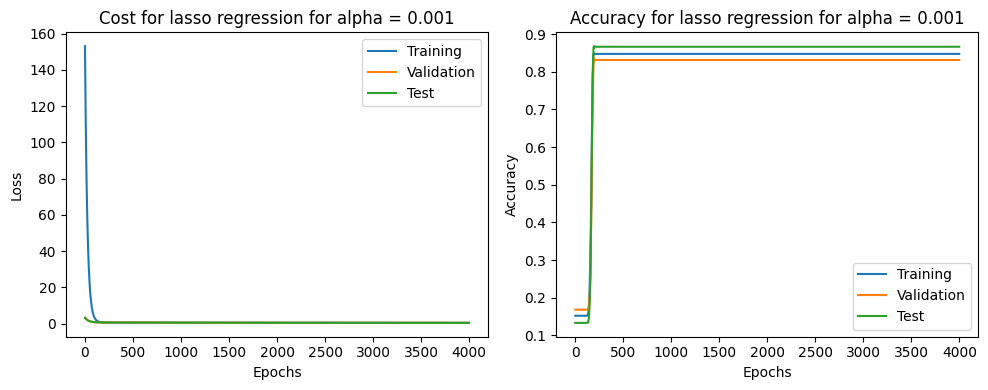

Training Loss:  0.4778055554036806
Training Accuracy:  0.8476062036412677
Validation Loss:  0.49193412687254945
Validation Accuracy:  0.831496062992126
Test Loss:  0.4601359718404014
Test Accuracy:  0.8665620094191523
Weights:  [-2.05822385e-03 -2.30709545e-03 -2.53701905e-03 -3.17945478e-03
 -7.00207598e-04  1.13777496e-04  6.18451259e-05 -7.06591063e-04
  1.40687552e-04 -1.24368568e-03 -1.14412684e-03 -2.13610860e-03
 -1.57483319e-03 -2.21709869e-03 -6.48877751e-04]
Bias:  -0.9007296605597906


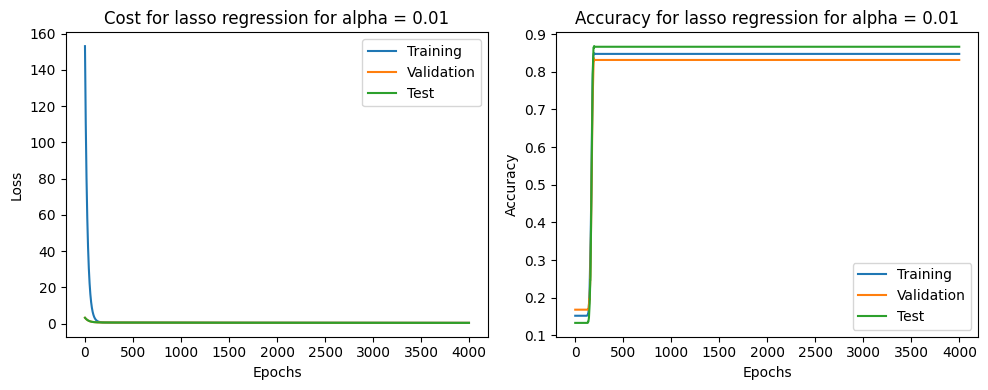

Training Loss:  0.4778055554036806
Training Accuracy:  0.8476062036412677
Validation Loss:  0.49193412687254945
Validation Accuracy:  0.831496062992126
Test Loss:  0.4601359718404014
Test Accuracy:  0.8665620094191523
Weights:  [-2.05822385e-03 -2.30709545e-03 -2.53701905e-03 -3.17945478e-03
 -7.00207598e-04  1.13777496e-04  6.18451259e-05 -7.06591063e-04
  1.40687552e-04 -1.24368568e-03 -1.14412684e-03 -2.13610860e-03
 -1.57483319e-03 -2.21709869e-03 -6.48877751e-04]
Bias:  -0.9007296605597906


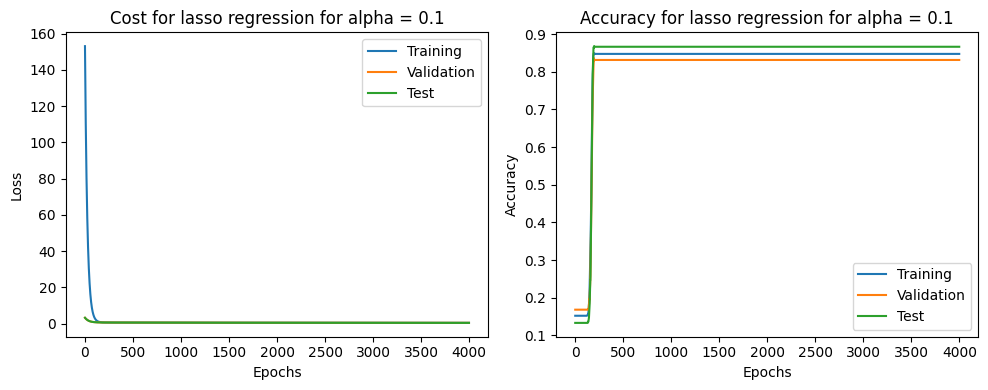

Training Loss:  0.4778055554036806
Training Accuracy:  0.8476062036412677
Validation Loss:  0.49193412687254945
Validation Accuracy:  0.831496062992126
Test Loss:  0.4601359718404014
Test Accuracy:  0.8665620094191523
Weights:  [-2.05822385e-03 -2.30709545e-03 -2.53701905e-03 -3.17945478e-03
 -7.00207598e-04  1.13777496e-04  6.18451259e-05 -7.06591063e-04
  1.40687552e-04 -1.24368568e-03 -1.14412684e-03 -2.13610860e-03
 -1.57483319e-03 -2.21709869e-03 -6.48877751e-04]
Bias:  -0.9007296605597906


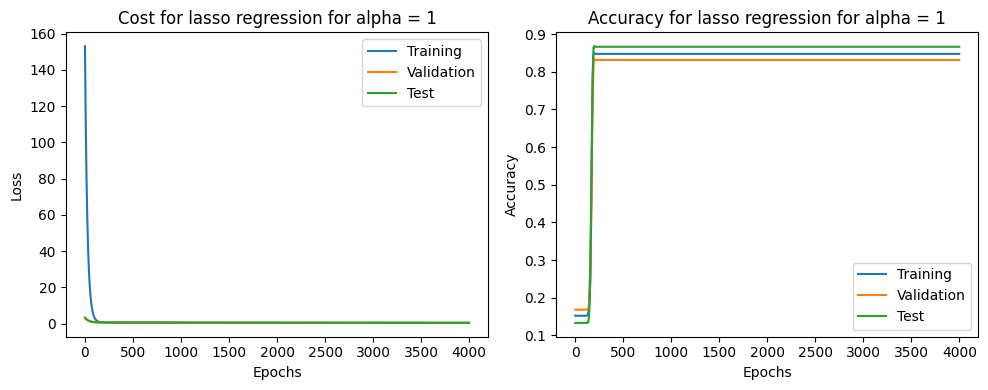

Training Loss:  0.4778055554036806
Training Accuracy:  0.8476062036412677
Validation Loss:  0.49193412687254945
Validation Accuracy:  0.831496062992126
Test Loss:  0.4601359718404014
Test Accuracy:  0.8665620094191523
Weights:  [-2.05822385e-03 -2.30709545e-03 -2.53701905e-03 -3.17945478e-03
 -7.00207598e-04  1.13777496e-04  6.18451259e-05 -7.06591063e-04
  1.40687552e-04 -1.24368568e-03 -1.14412684e-03 -2.13610860e-03
 -1.57483319e-03 -2.21709869e-03 -6.48877751e-04]
Bias:  -0.9007296605597906


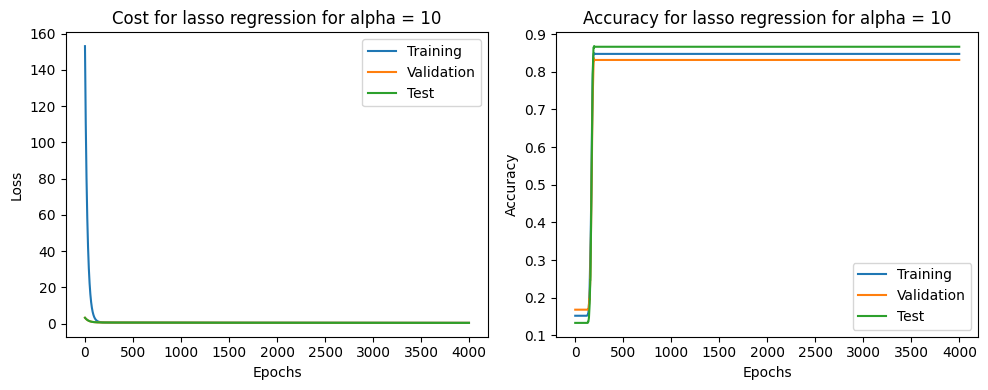

Training Loss:  0.4778055554036806
Training Accuracy:  0.8476062036412677
Validation Loss:  0.49193412687254945
Validation Accuracy:  0.831496062992126
Test Loss:  0.4601359718404014
Test Accuracy:  0.8665620094191523
Weights:  [-2.05822385e-03 -2.30709545e-03 -2.53701905e-03 -3.17945478e-03
 -7.00207598e-04  1.13777496e-04  6.18451259e-05 -7.06591063e-04
  1.40687552e-04 -1.24368568e-03 -1.14412684e-03 -2.13610860e-03
 -1.57483319e-03 -2.21709869e-03 -6.48877751e-04]
Bias:  -0.9007296605597906


In [395]:
for alpha in alphas:
    results_lasso = gradient_descent_lasso(X_train_scaled, Y_train, X_val_scaled, Y_val, X_test_scaled, Y_test, 0.001, 4000, alpha)
    W_lasso = results_lasso[0]
    b_lasso = results_lasso[1]
    train_loss_lasso = results_lasso[2]
    val_loss_lasso = results_lasso[3]
    test_loss_lasso = results_lasso[4]
    train_accuracy_lasso = results_lasso[5]
    val_accuracy_lasso = results_lasso[6]
    test_accuracy_lasso = results_lasso[7]
    Weights_lasso = results_lasso[8]
    Biases_lasso = results_lasso[9]

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(val_loss, label='val loss')
    plt.plot(test_loss, label='test loss')
    plt.title('Cost for lasso regression for alpha = ' + str(alpha))
    plt.legend(['Training', 'Validation', 'Test'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='train accuracy')
    plt.plot(val_accuracy, label='val accuracy')
    plt.plot(test_accuracy, label='test accuracy')
    plt.title('Accuracy for lasso regression for alpha = ' + str(alpha))
    plt.legend(['Training', 'Validation', 'Test'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

    print("Training Loss: ", train_loss[-1])
    print("Training Accuracy: ", train_accuracy[-1])
    print("Validation Loss: ", val_loss[-1])
    print("Validation Accuracy: ", val_accuracy[-1])
    print("Test Loss: ", test_loss[-1])
    print("Test Accuracy: ", test_accuracy[-1])

    print("Weights: ", W)
    print("Bias: ", b)

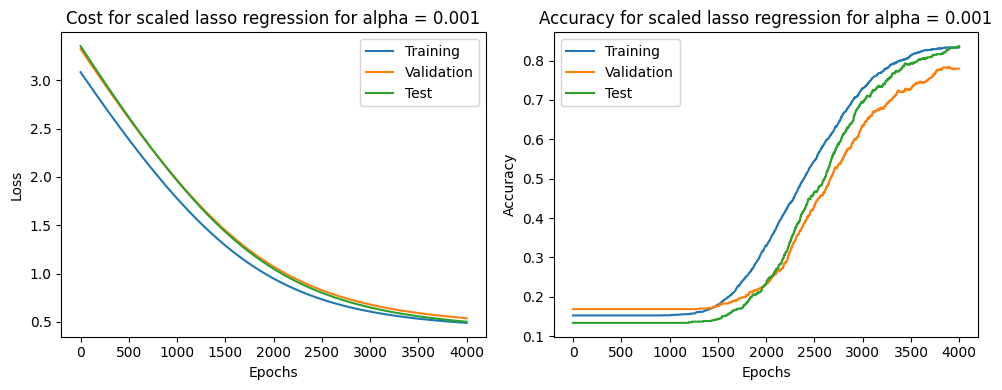

Training Loss:  0.48940845248860343
Training Accuracy:  0.8334457181389077
Validation Loss:  0.5379321800448056
Validation Accuracy:  0.7795275590551181
Test Loss:  0.5013377492461367
Test Accuracy:  0.8367346938775511
Weights:  [ 0.14525377  0.13218723  0.32125018 -0.01334728  0.73385779  0.94000539
  0.98931912  0.38083679  0.95030362  0.61275125  0.56369445  0.28344206
  0.50809469  0.34474569  0.76922672]
Bias:  -1.9426387368113978


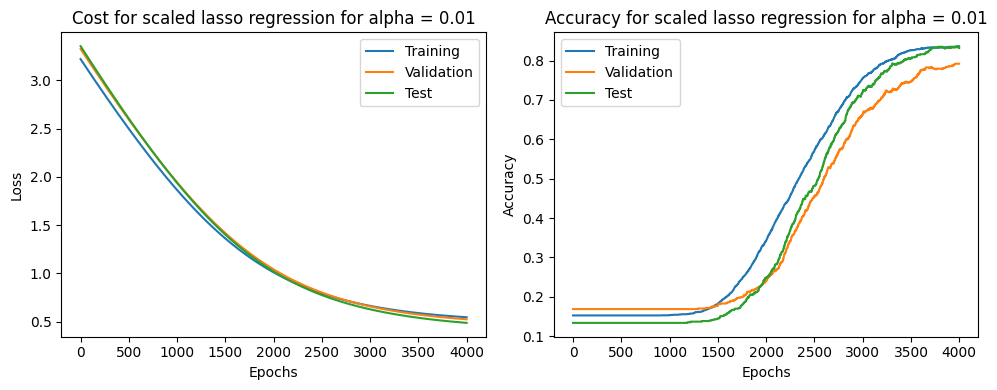

Training Loss:  0.5457948384945649
Training Accuracy:  0.8364801078894134
Validation Loss:  0.524664434931338
Validation Accuracy:  0.7921259842519685
Test Loss:  0.48765317486174203
Test Accuracy:  0.8320251177394035
Weights:  [ 0.12546532  0.11151515  0.2960742  -0.02507149  0.7027425   0.90509775
  0.95350784  0.35722714  0.91525217  0.58314717  0.5353287   0.25964616
  0.48023732  0.31944695  0.73705695]
Bias:  -1.9110265410158902


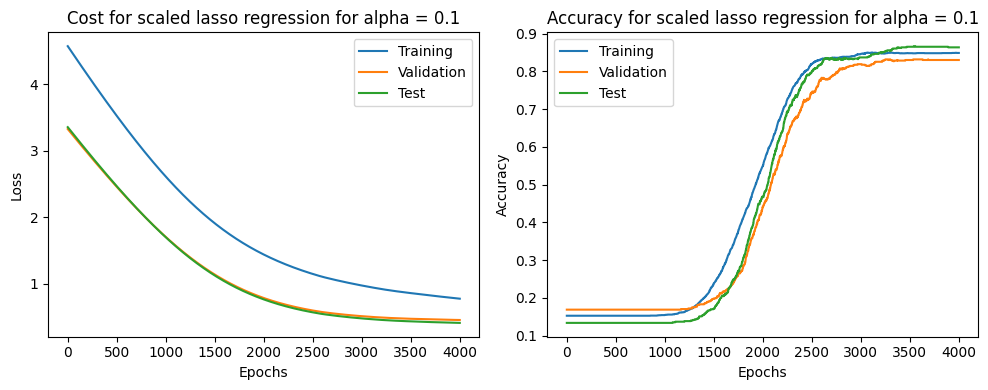

Training Loss:  0.7779408474180668
Training Accuracy:  0.8486176668914363
Validation Loss:  0.4580769503726508
Validation Accuracy:  0.8299212598425196
Test Loss:  0.4145951103688879
Test Accuracy:  0.8634222919937206
Weights:  [ 2.73249142e-05 -1.03941955e-05  3.80590564e-02 -1.16639533e-04
  3.87220517e-01  5.57828839e-01  5.95718944e-01  1.19771240e-01
  5.66165676e-01  2.83260118e-01  2.48086618e-01  1.52643650e-02
  1.97103826e-01  5.98230753e-02  4.13576567e-01]
Bias:  -1.6159221997693836


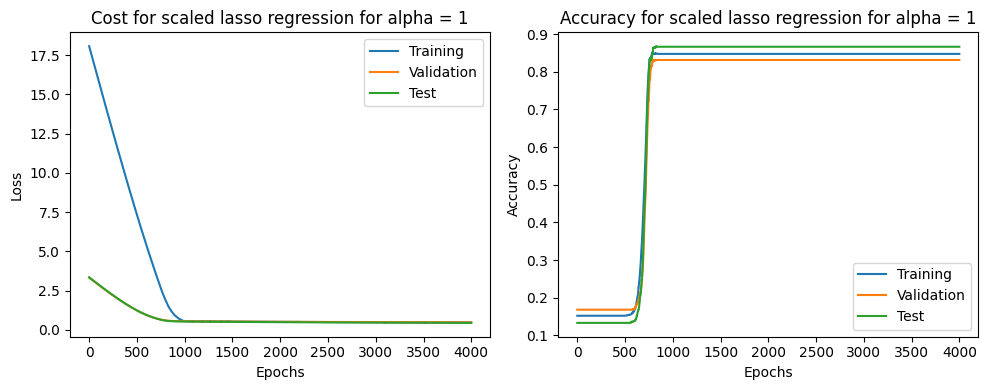

Training Loss:  0.4736790150095857
Training Accuracy:  0.8476062036412677
Validation Loss:  0.48076754522982224
Validation Accuracy:  0.831496062992126
Test Loss:  0.4453464235614368
Test Accuracy:  0.8665620094191523
Weights:  [-6.78323698e-04 -1.58277346e-04 -3.09905426e-04  4.60400216e-04
  2.55229073e-04 -4.64887449e-04  1.72792808e-04 -7.10075164e-04
 -5.04938671e-04  3.62360320e-05 -8.54340037e-04  1.22673408e-04
  7.84453115e-04 -3.20363969e-04 -7.51008429e-05]
Bias:  -1.0098742875919615


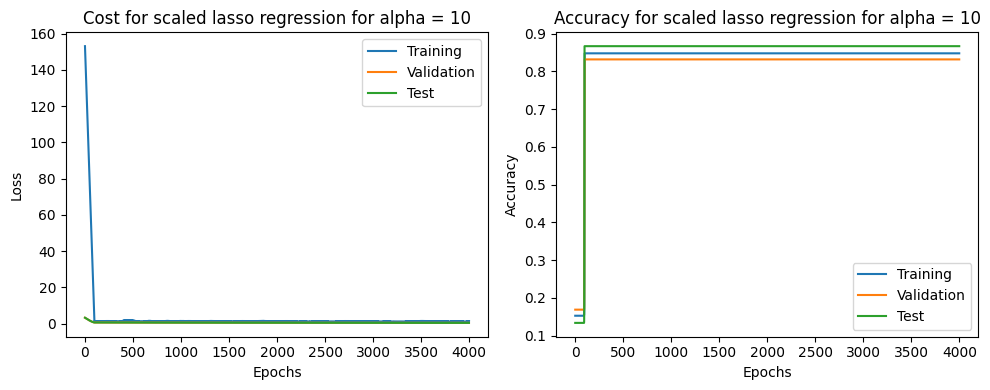

Training Loss:  1.3298285709642867
Training Accuracy:  0.8476062036412677
Validation Loss:  0.49341614872023026
Validation Accuracy:  0.831496062992126
Test Loss:  0.4620209479410335
Test Accuracy:  0.8665620094191523
Weights:  [-0.00067921  0.00732113  0.00188976  0.00582616 -0.00285673 -0.00135517
  0.00310072 -0.00793749  0.00193161  0.00938149  0.0071607  -0.00271354
  0.00402341  0.00330253  0.00505443]
Bias:  -0.9057295197050361


In [396]:
for alpha in alphas:
    results_scaled_lasso = gradient_descent_scaled_lasso(X_train_scaled, Y_train, X_val_scaled, Y_val, X_test_scaled, Y_test, 0.001, 4000, alpha)
    W_scaled_lasso = results_scaled_lasso[0]
    b_scaled_lasso = results_scaled_lasso[1]
    train_loss_scaled_lasso = results_scaled_lasso[2]
    val_loss_scaled_lasso = results_scaled_lasso[3]
    test_loss_scaled_lasso = results_scaled_lasso[4]
    train_accuracy_scaled_lasso = results_scaled_lasso[5]
    val_accuracy_scaled_lasso = results_scaled_lasso[6]
    test_accuracy_scaled_lasso = results_scaled_lasso[7]
    Weights_scaled_lasso = results_scaled_lasso[8]
    Biases_scaled_lasso = results_scaled_lasso[9]

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_scaled_lasso, label='train loss')
    plt.plot(val_loss_scaled_lasso, label='val loss')
    plt.plot(test_loss_scaled_lasso, label='test loss')
    plt.title('Cost for scaled lasso regression for alpha = ' + str(alpha))
    plt.legend(['Training', 'Validation', 'Test'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy_scaled_lasso, label='train accuracy')
    plt.plot(val_accuracy_scaled_lasso, label='val accuracy')
    plt.plot(test_accuracy_scaled_lasso, label='test accuracy')
    plt.title('Accuracy for scaled lasso regression for alpha = ' + str(alpha))
    plt.legend(['Training', 'Validation', 'Test'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

    print("Training Loss: ", train_loss_scaled_lasso[-1])
    print("Training Accuracy: ", train_accuracy_scaled_lasso[-1])
    print("Validation Loss: ", val_loss_scaled_lasso[-1])
    print("Validation Accuracy: ", val_accuracy_scaled_lasso[-1])
    print("Test Loss: ", test_loss_scaled_lasso[-1])
    print("Test Accuracy: ", test_accuracy_scaled_lasso[-1])

    print("Weights: ", W_scaled_lasso)
    print("Bias: ", b_scaled_lasso)

For L1 regularization we see a more faster convergence for unscaled gradient descent in comparison to L2 regularisation. For scaled gradient descent the convergence for the different values of alpha is similar for both regularization methods. This is because L1 regularization is more effective in reducing the number of features by removing irrelevant features and hence the weights converge faster. However large values of alpha might result in loss of important features.